In [6]:
import neurokit2 as nk
%matplotlib inline
import matplotlib.pyplot as plt


def split_phasic_tonic_signals(df):
    # Compute the Skin Potential Response (SPR) signal
    spr_signal = nk.eda_phasic(df['EDA_1'])

    return spr_signal

def plot_phasic_tonic_signals(spr_signal, csv_file_path):
    # Visualize the original EDA data and the extracted SPR signal (optional)

    plt.figure(figsize=(12, 6))
    plt.subplot(2, 1, 1)
    plt.plot(spr_signal['EDA_Phasic'], label='Extracted EDA_Phasic')
    plt.ylabel('EDA')
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.plot(spr_signal['EDA_Tonic'], label='Extracted EDA_Tonic')
    plt.ylabel('EDA_Tonic')
    plt.legend()

    plt.tight_layout()

    plt.savefig(csv_file_path[:-4] + '_phasic_tonic_signals.png')

    #plt.show()


C:\Users\gmedeirosmachado\AppData\Local\Temp\ipykernel_24876\3155799410.py:17: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file_path)
C:\Users\gmedeirosmachado\AppData\Local\Temp\ipykernel_24876\3155799410.py:17: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file_path)
C:\Users\gmedeirosmachado\AppData\Local\Temp\ipykernel_24876\3155799410.py:17: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file_path)
C:\Users\gmedeirosmachado\AppData\Local\Temp\ipykernel_24876\3155799410.py:17: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file_path)
C:\Users\gmedeirosmachado\AppData\Local\Temp\ipykernel_24876\3155799410.py:17: DtypeWarning: Columns (7) have mixed types. Specify dtype option on i

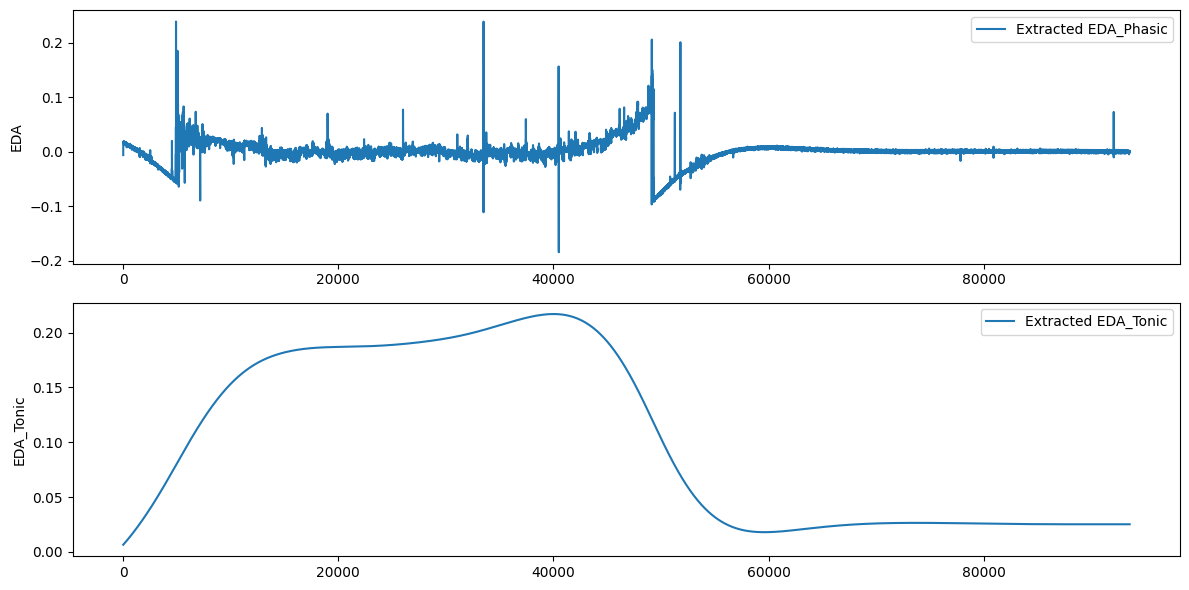

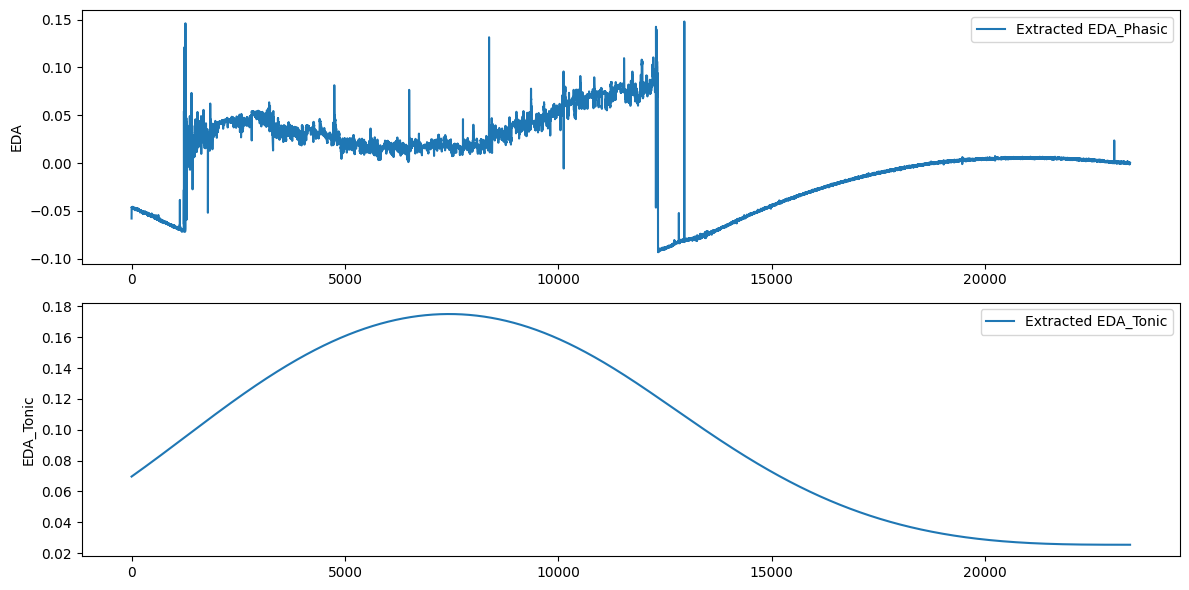

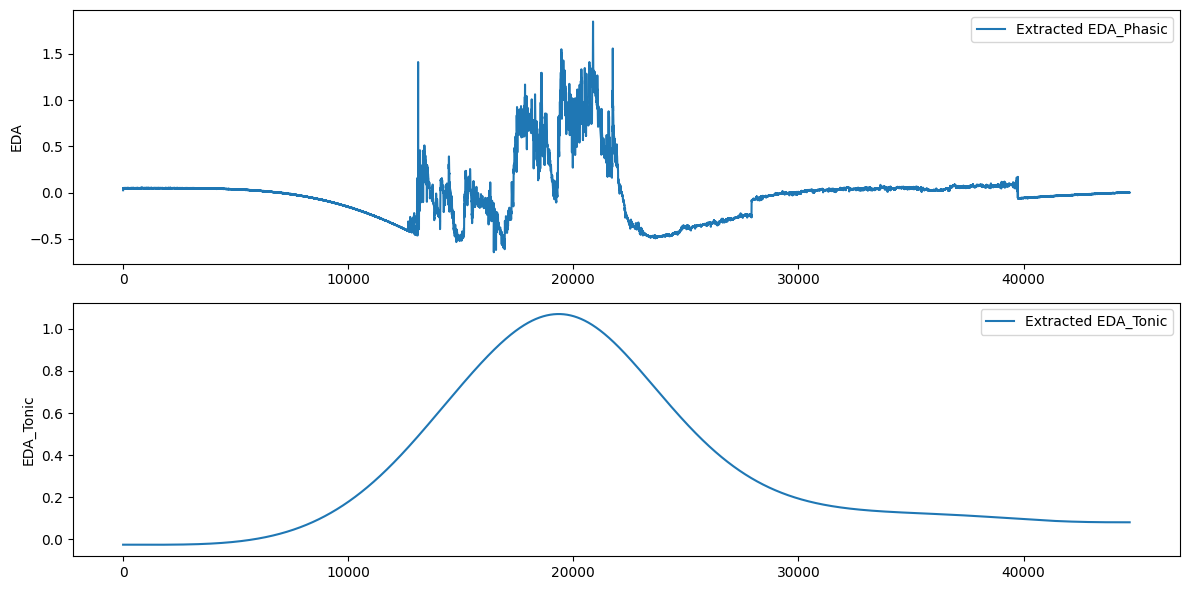

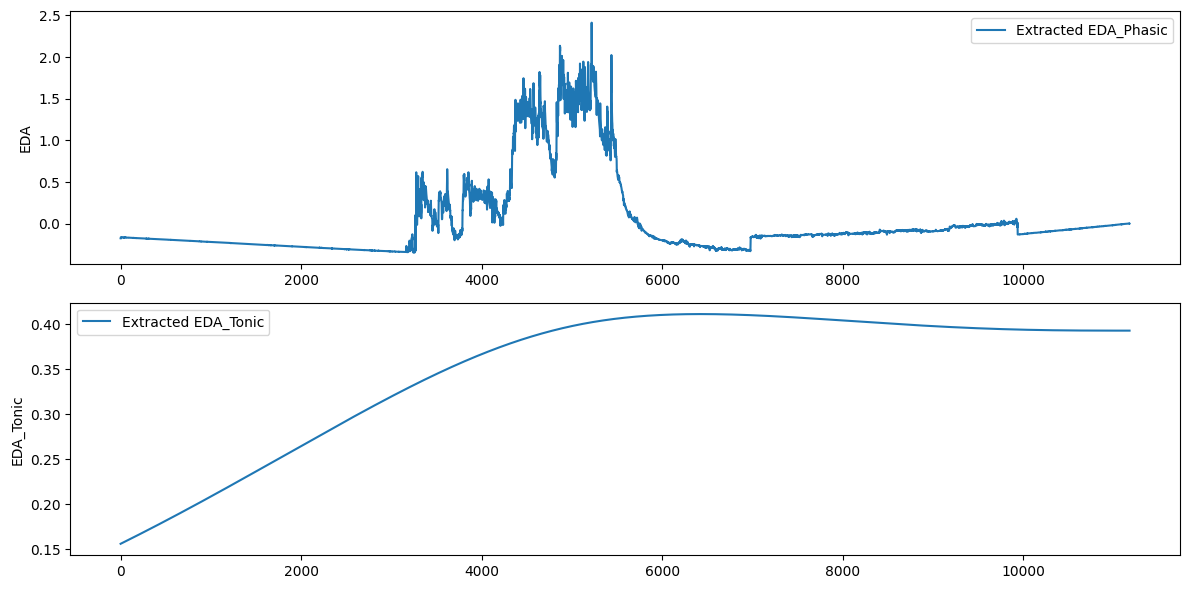

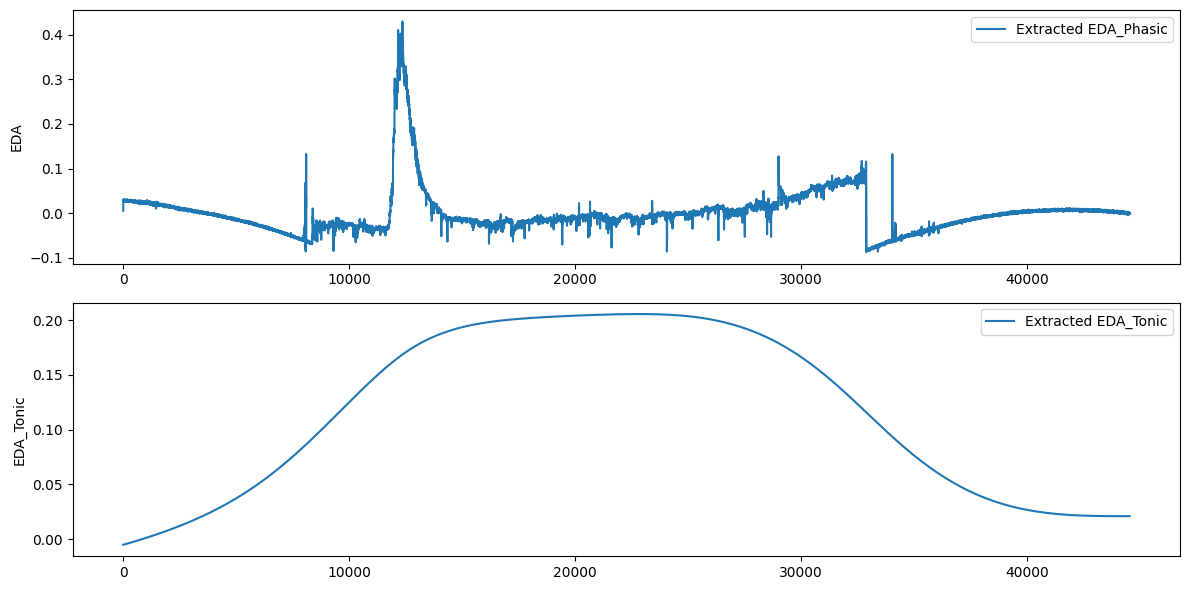

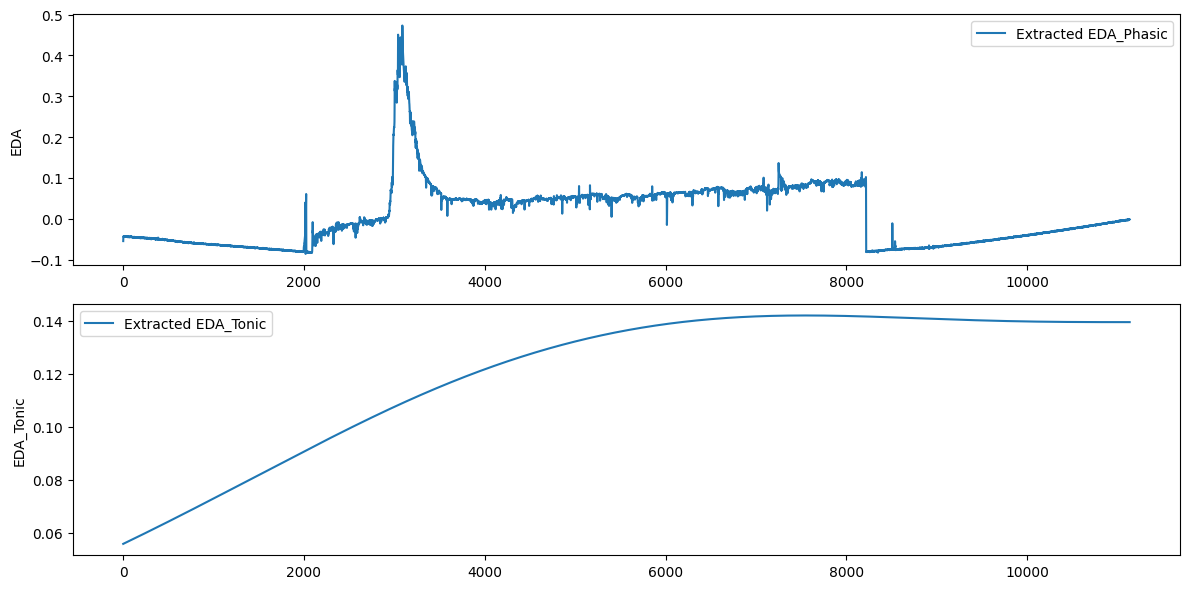

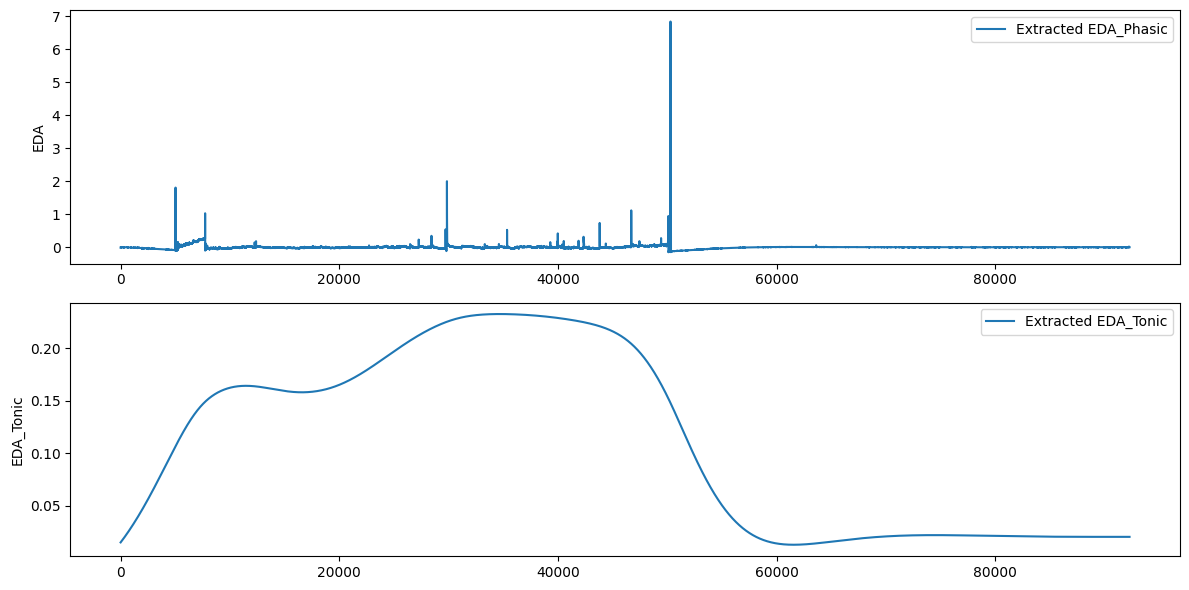

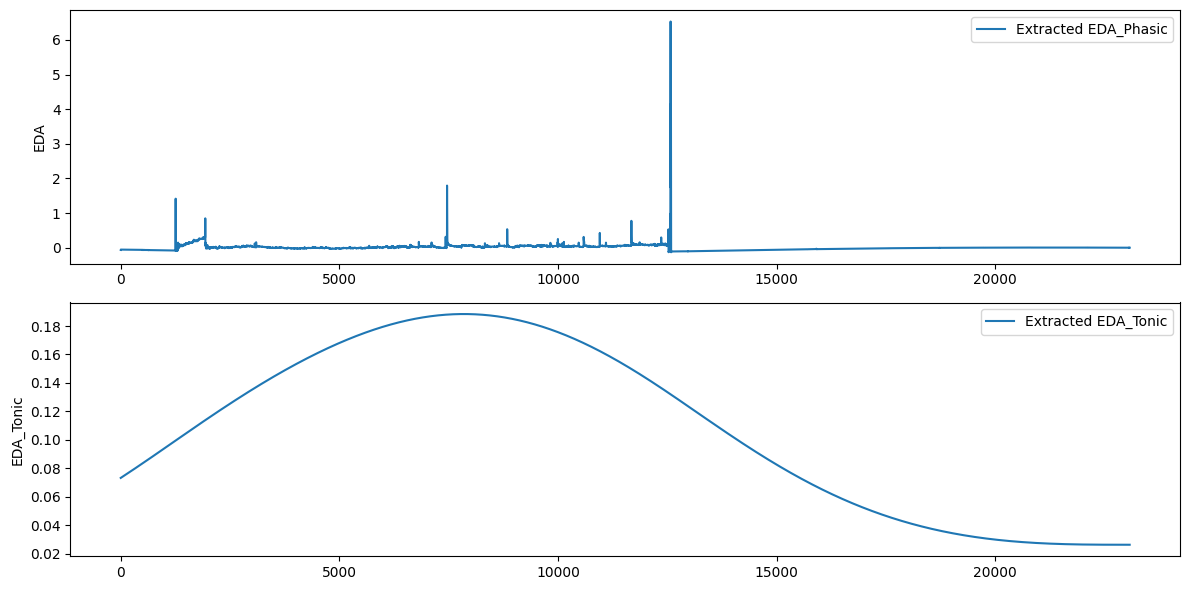

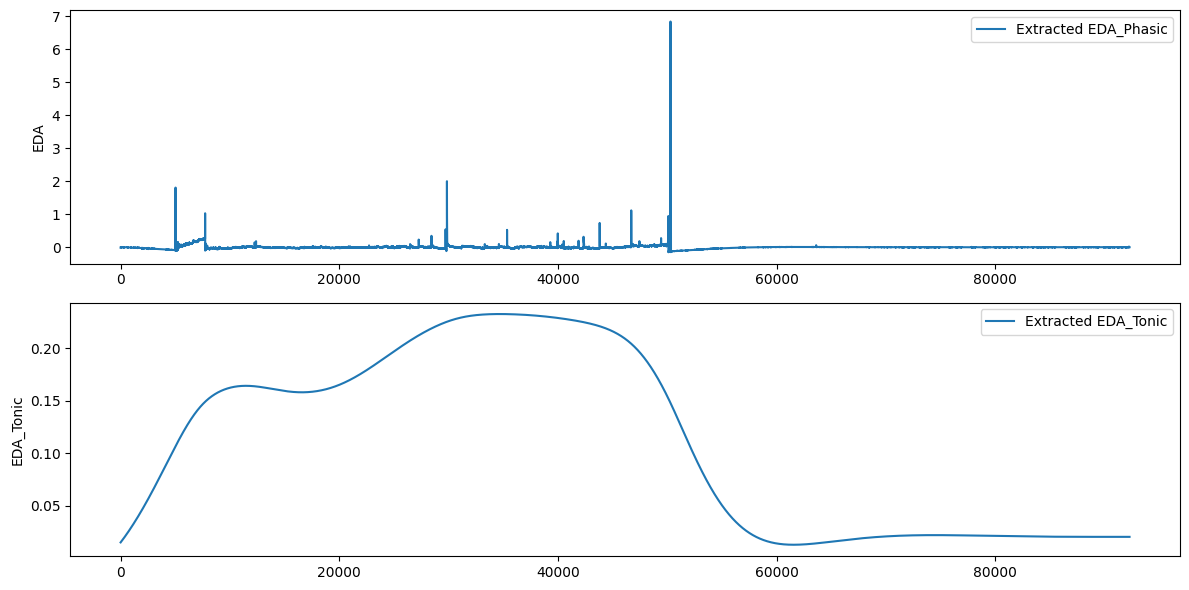

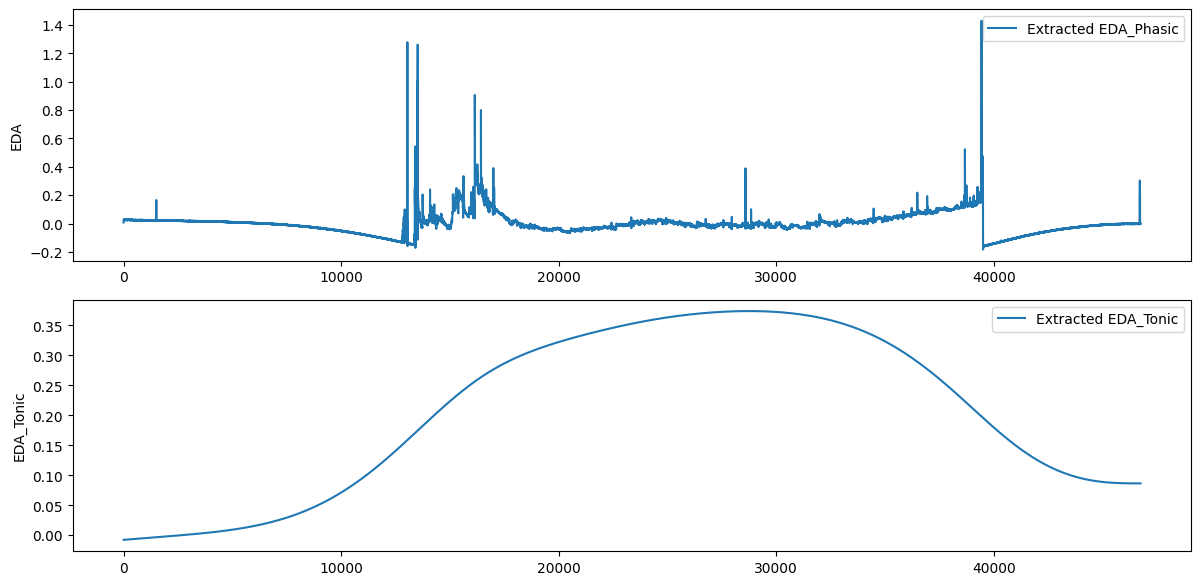

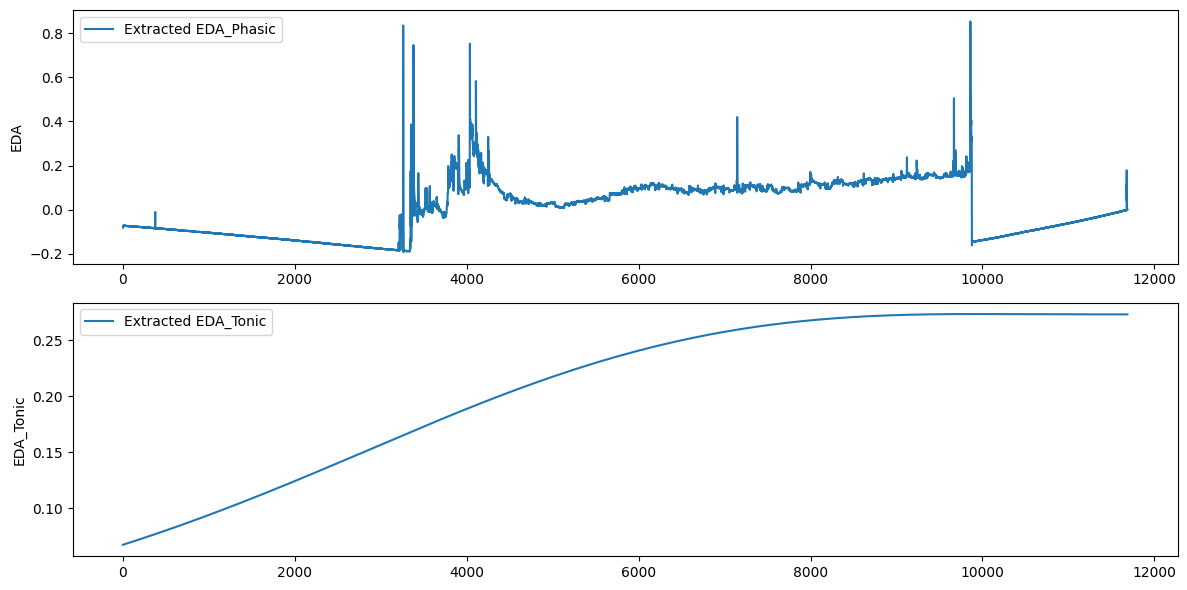

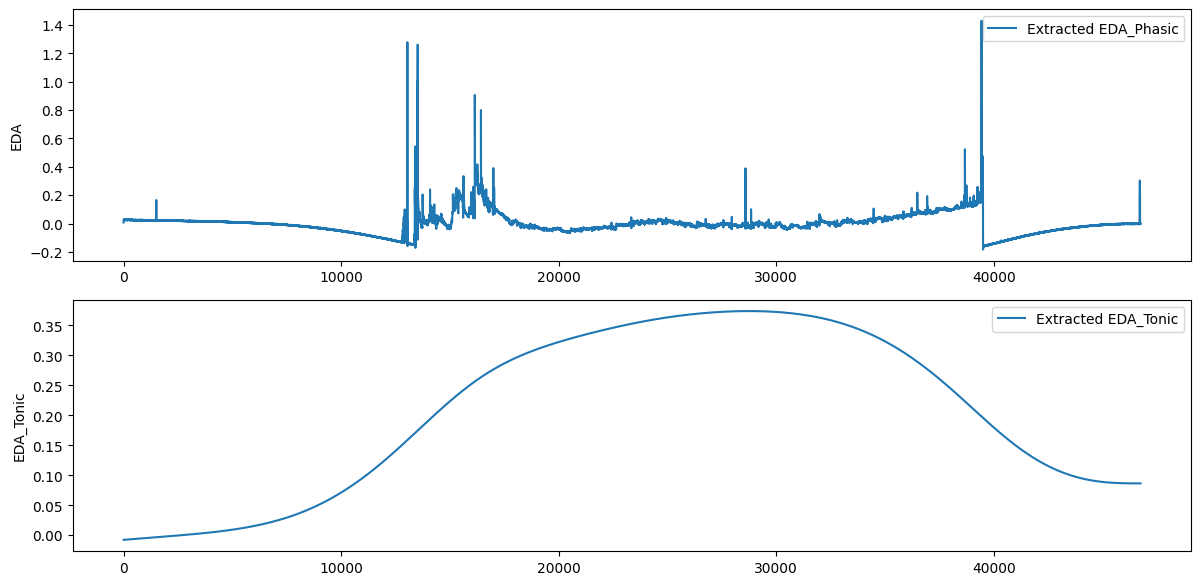

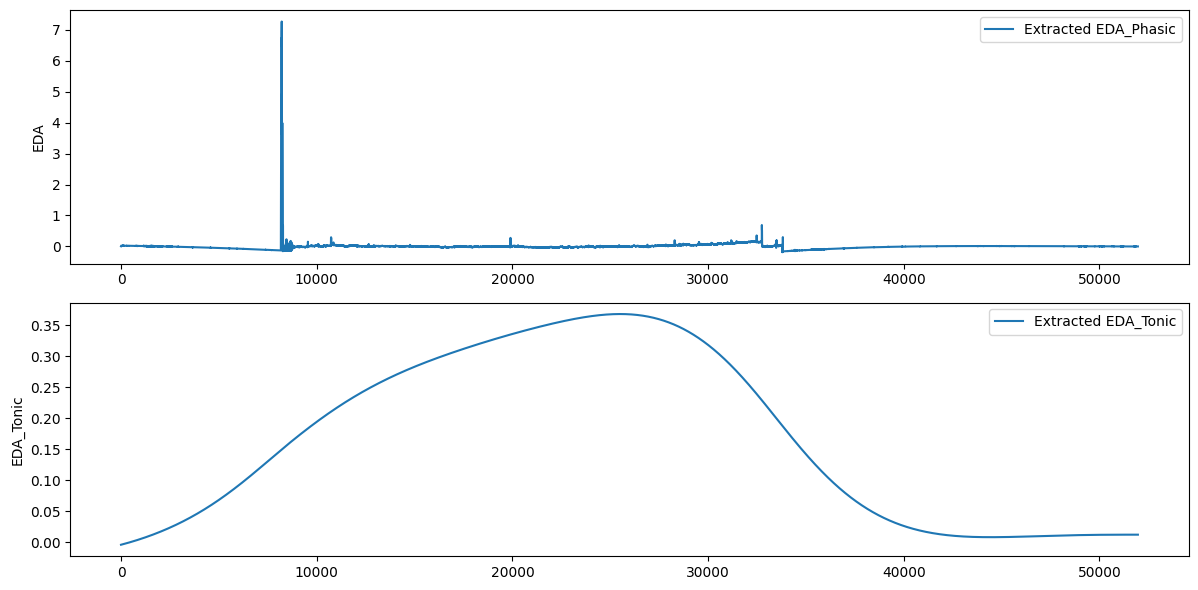

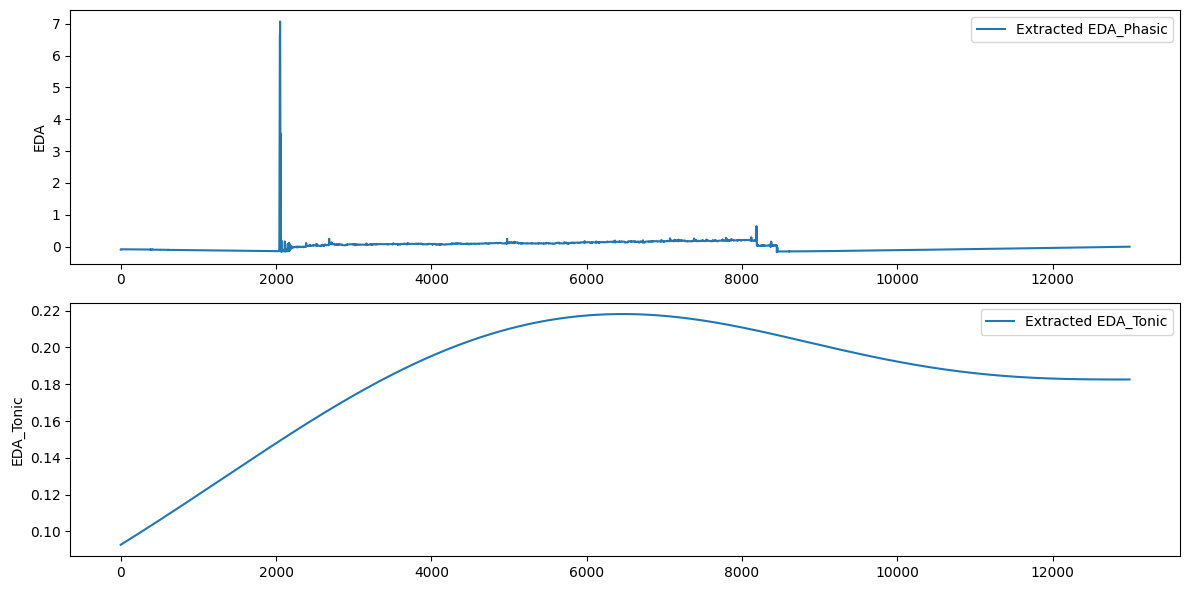

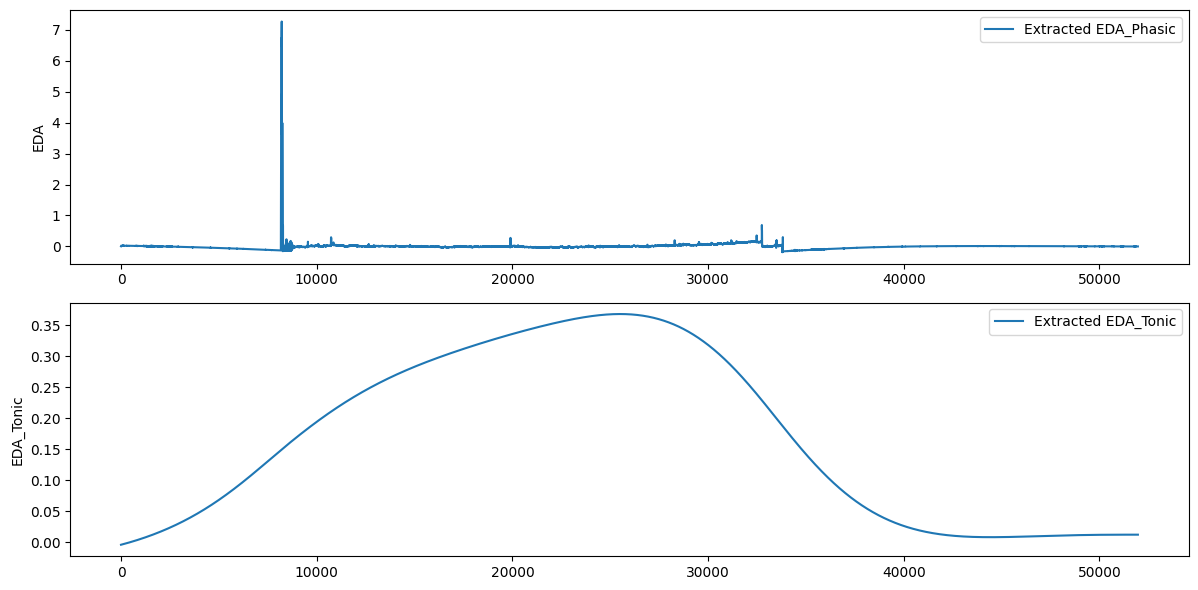

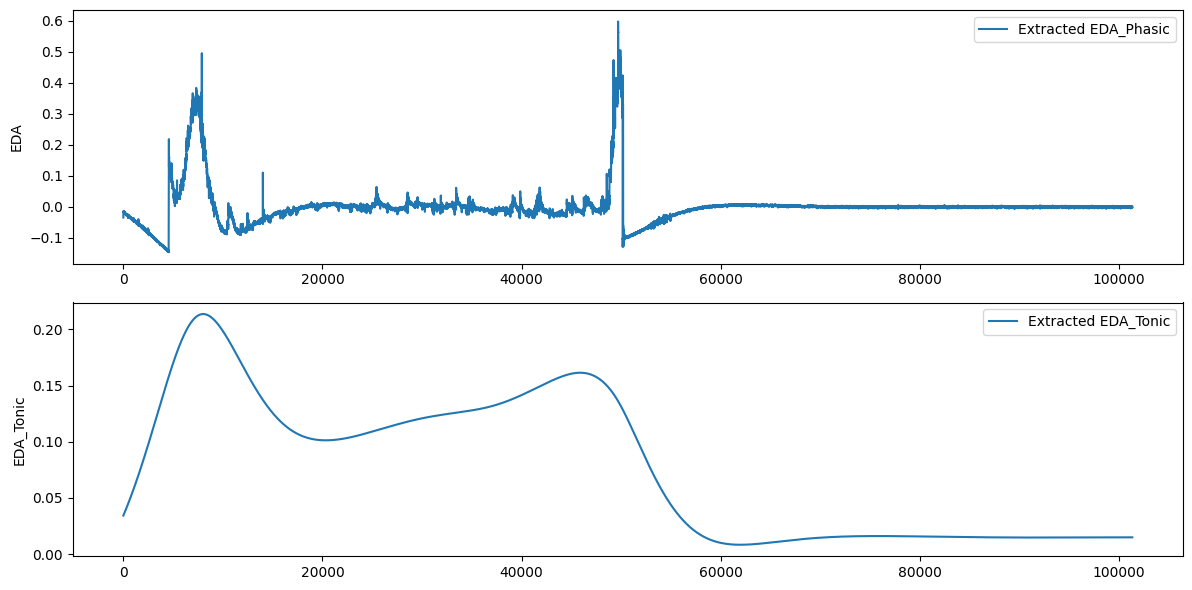

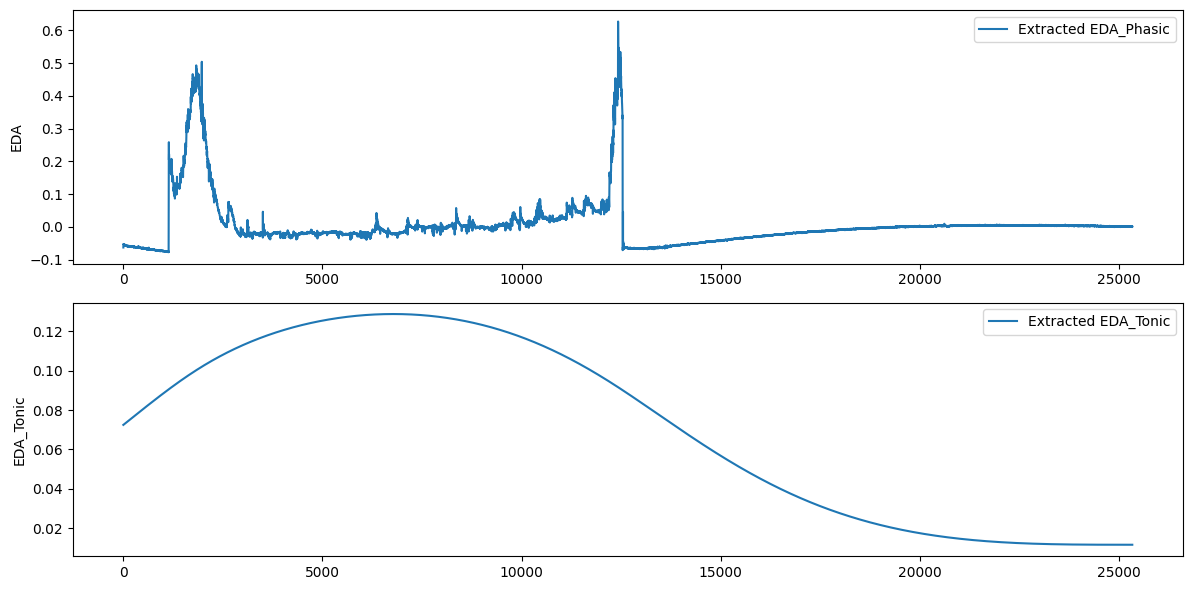

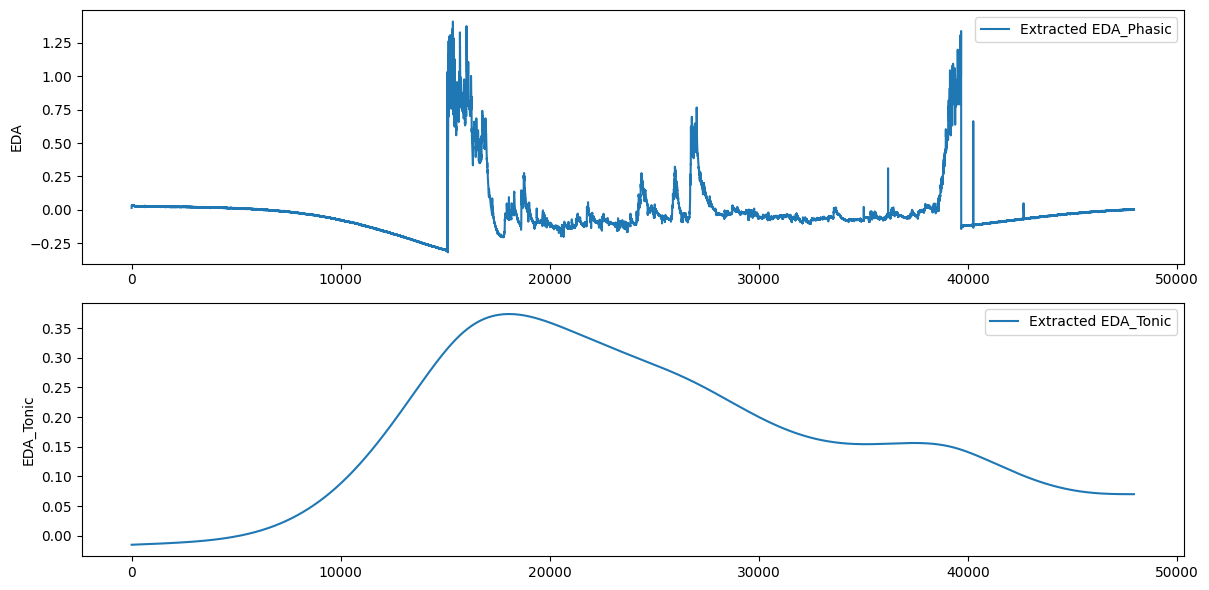

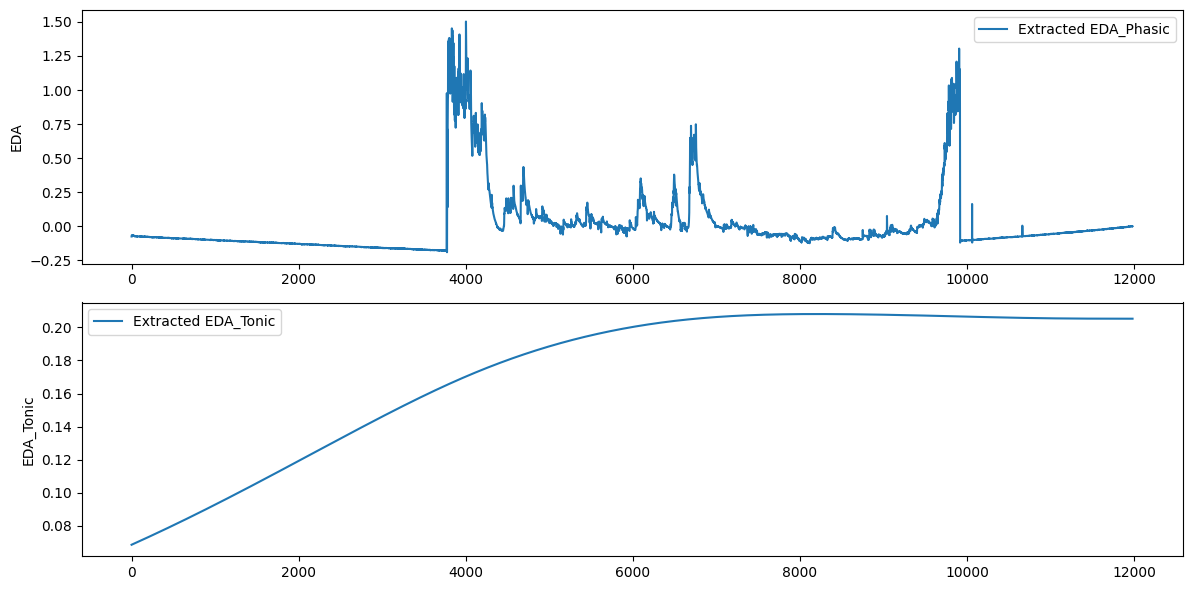

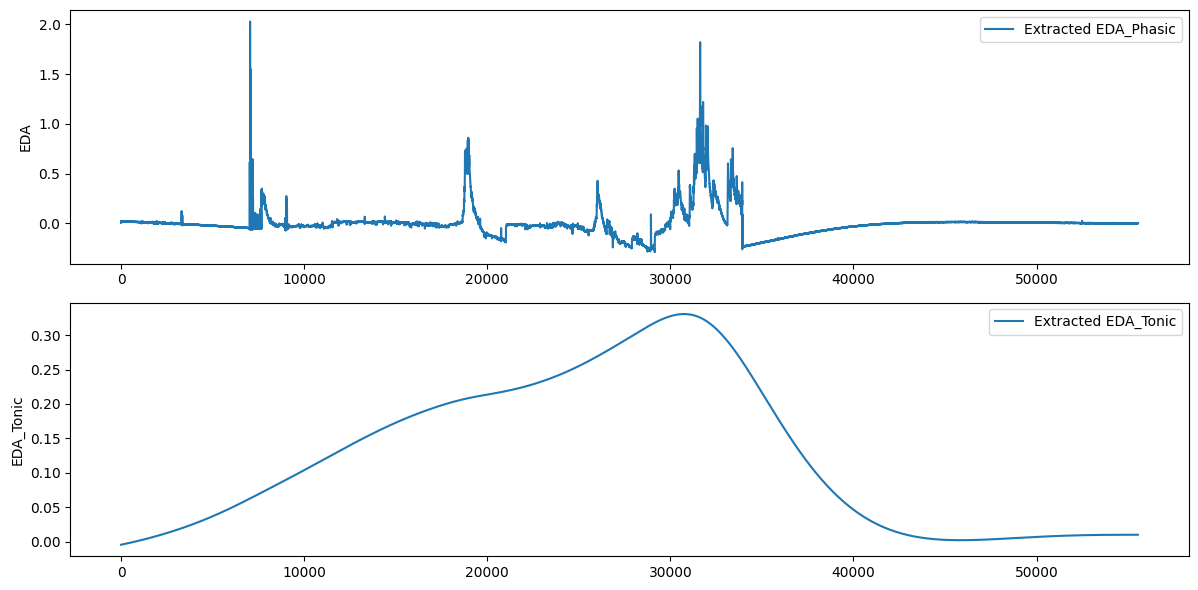

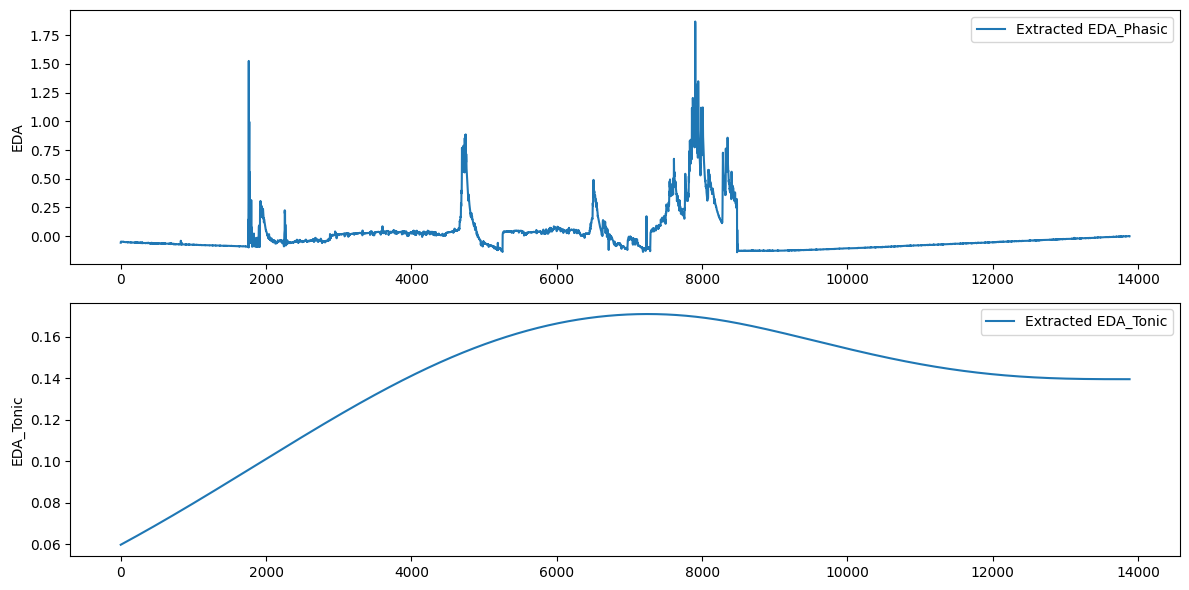

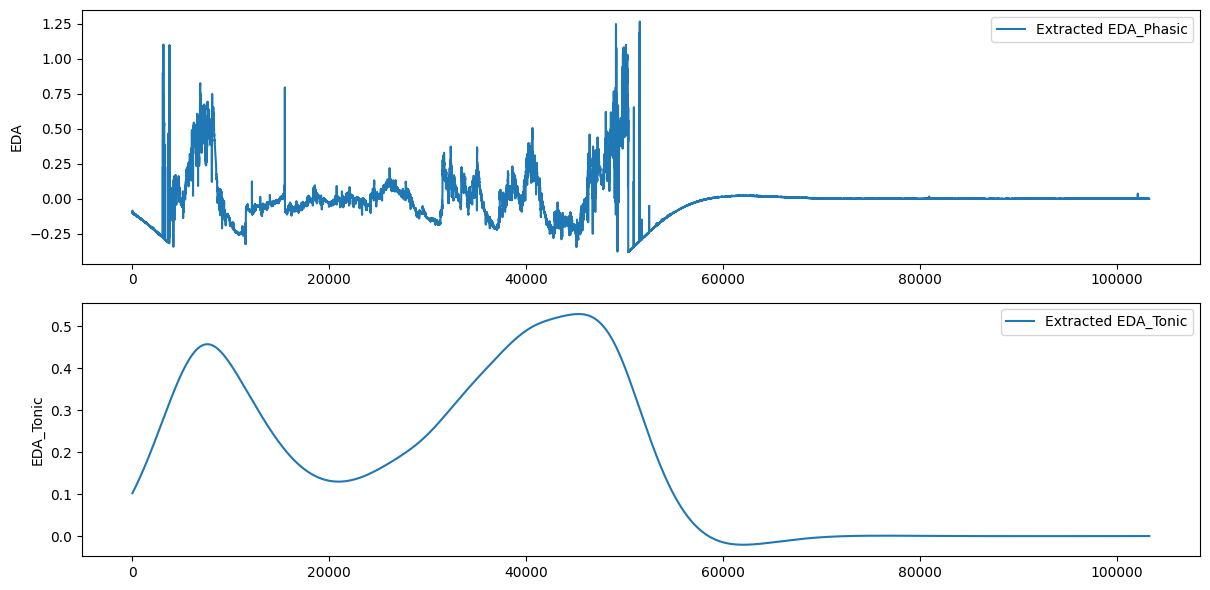

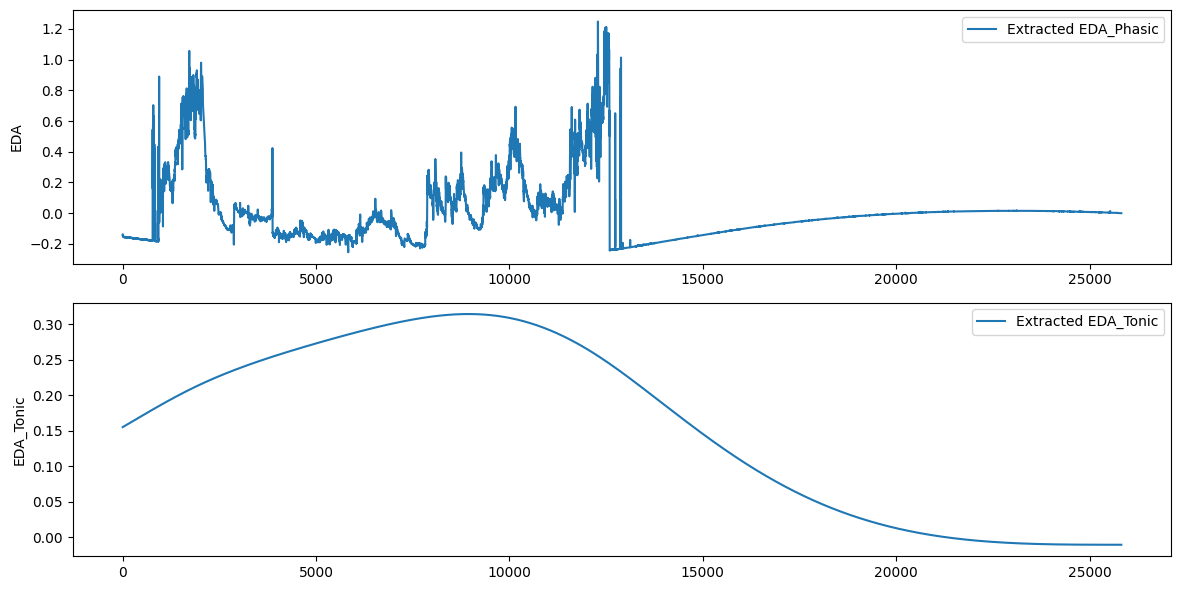

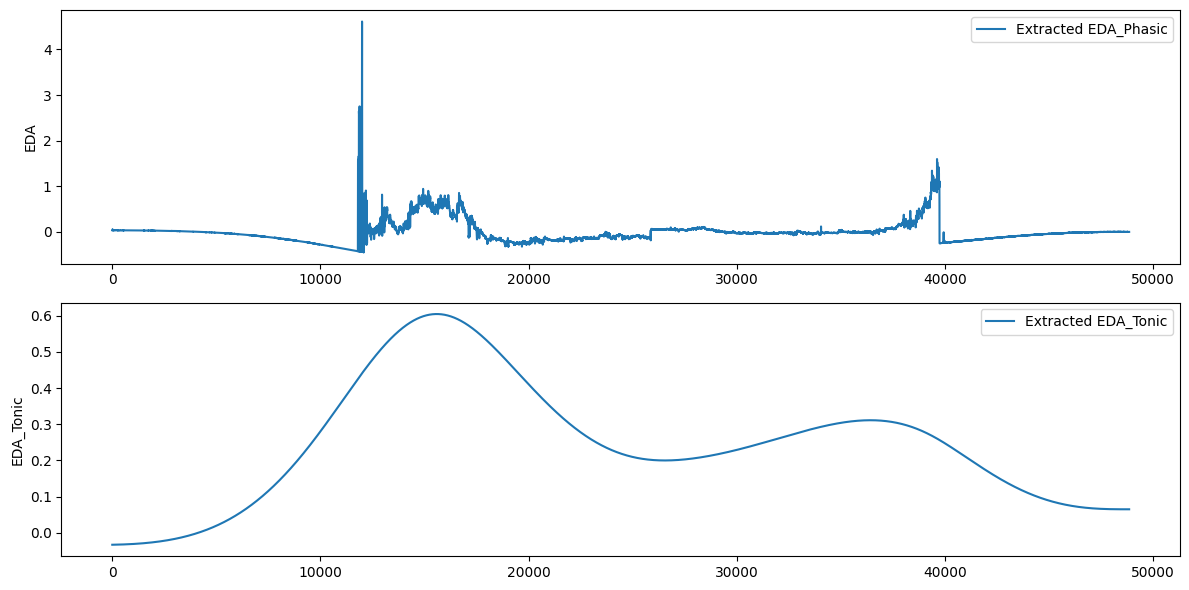

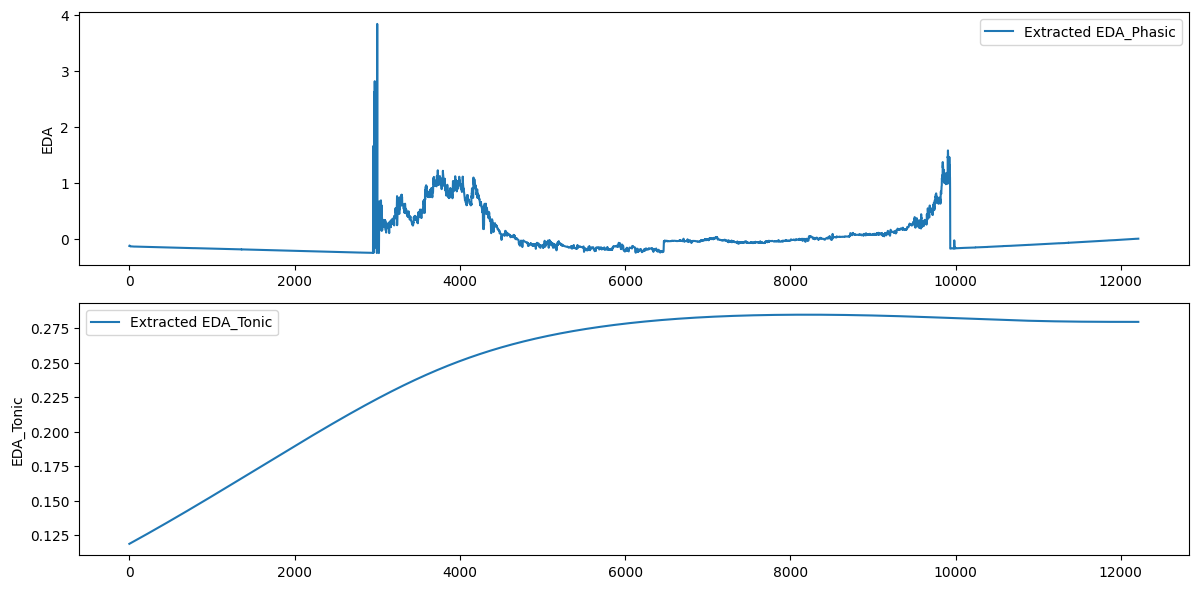

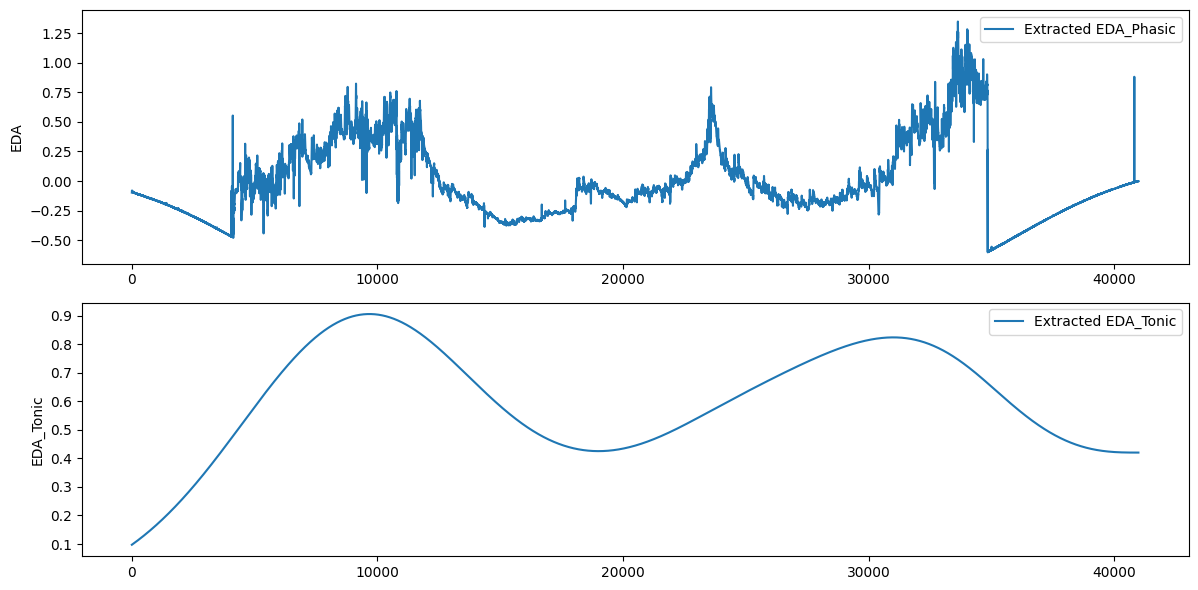

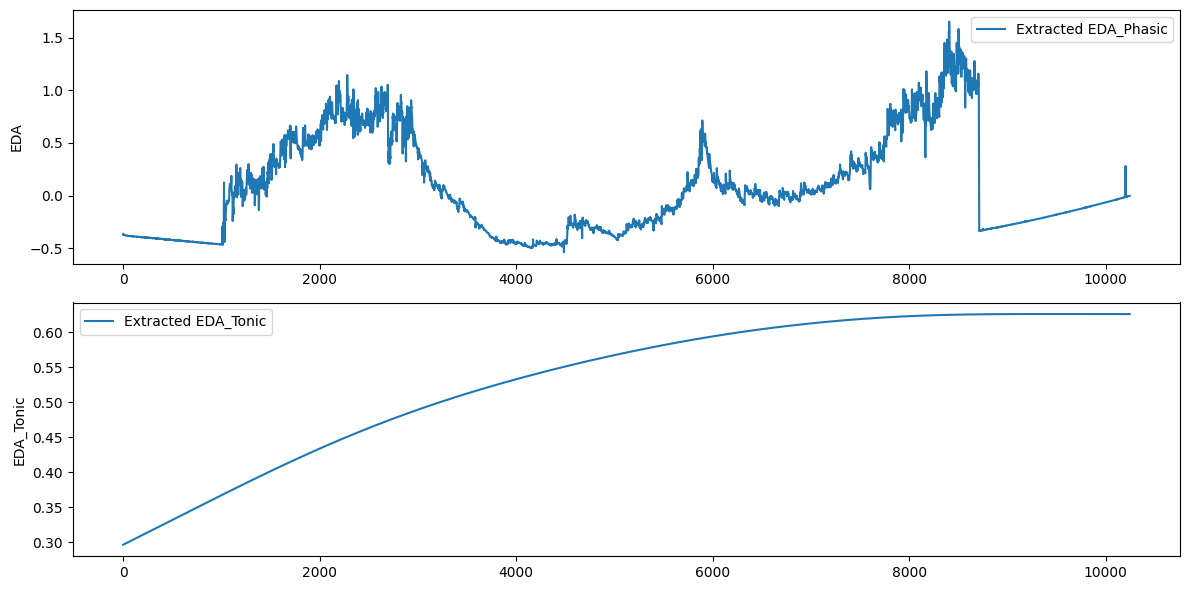

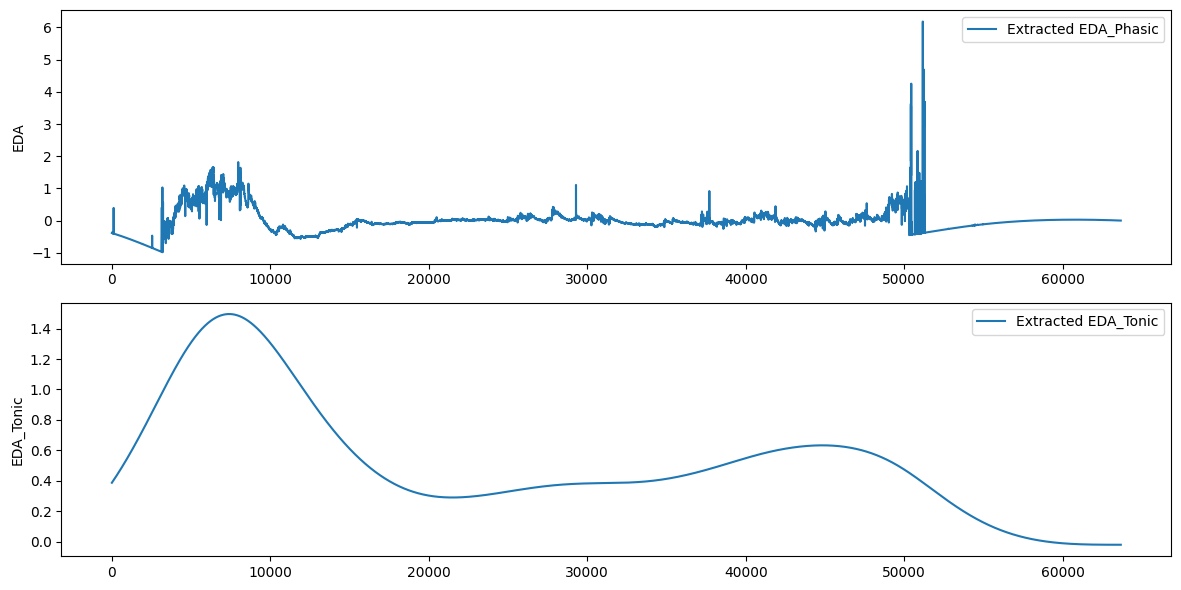

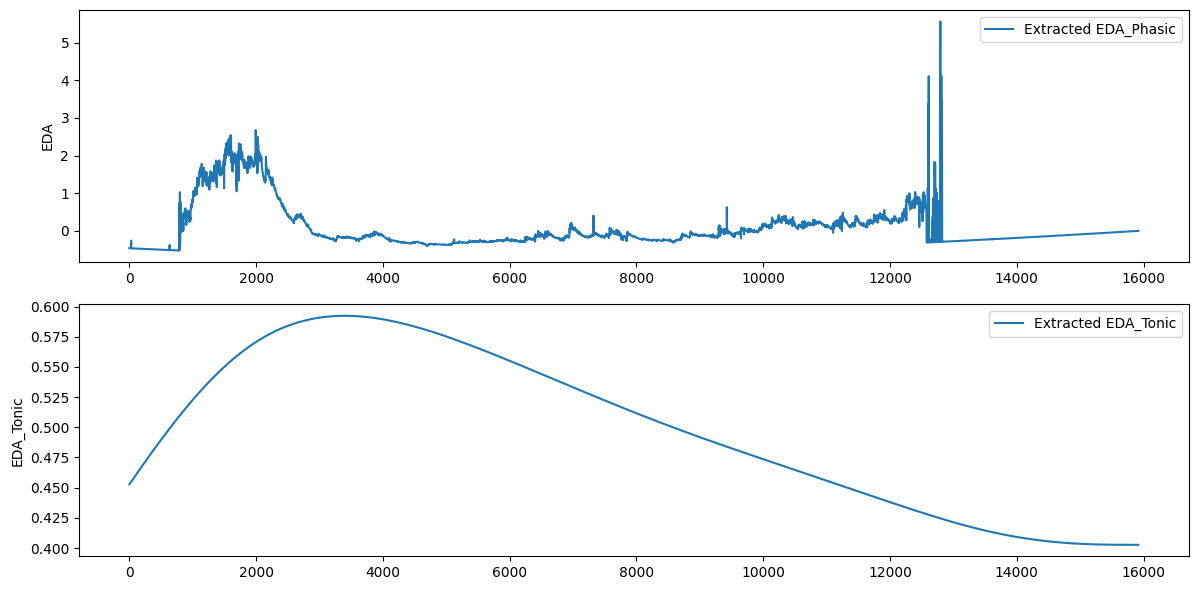

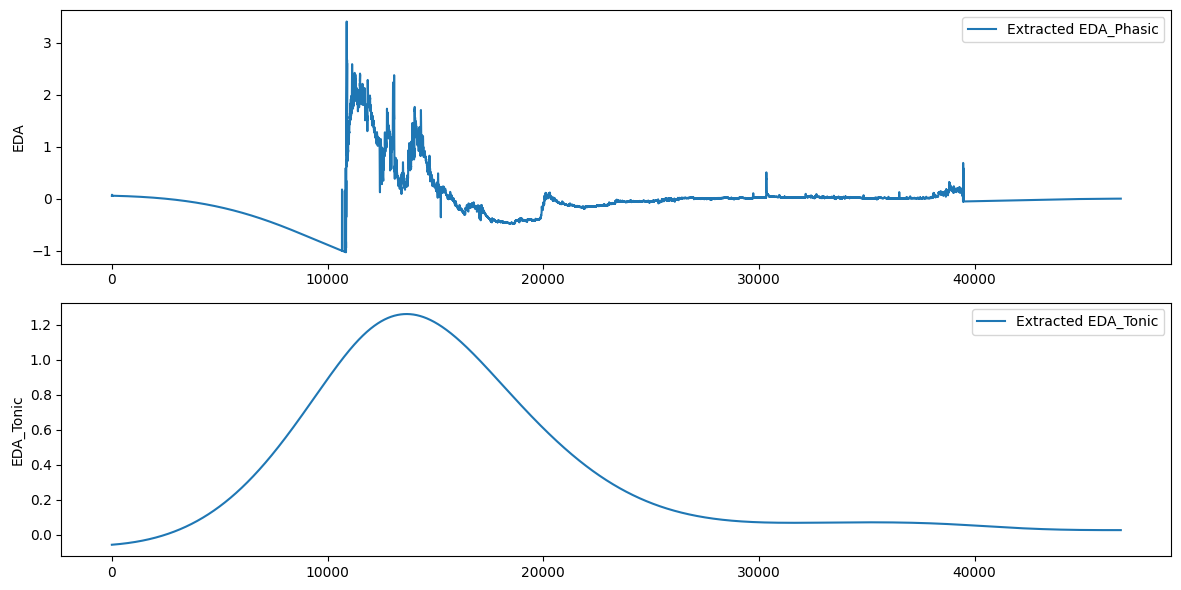

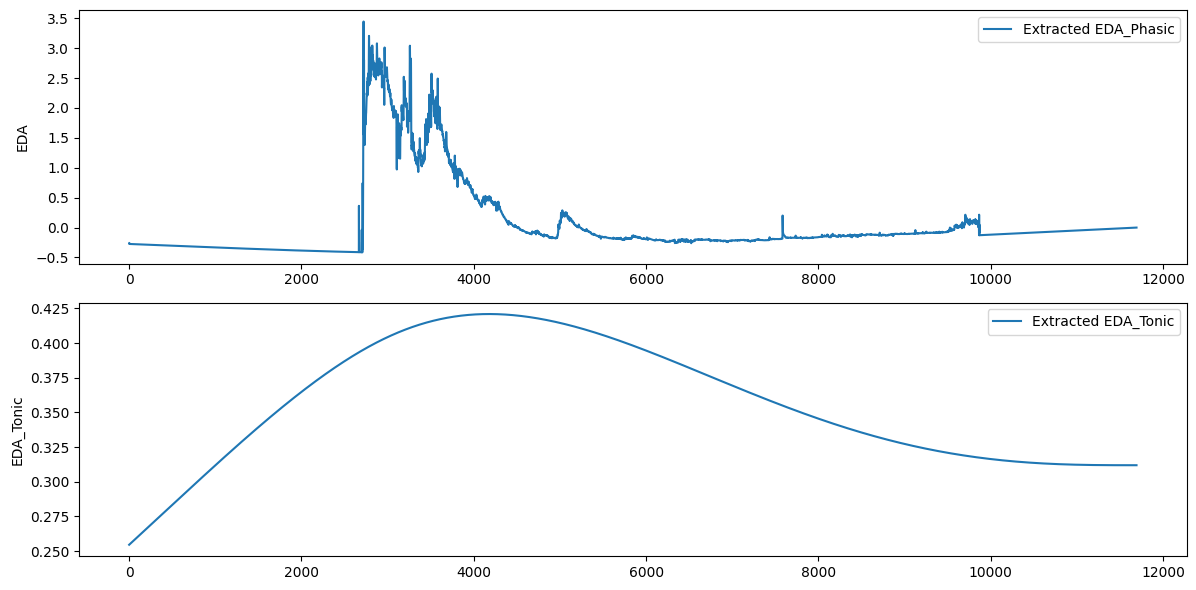

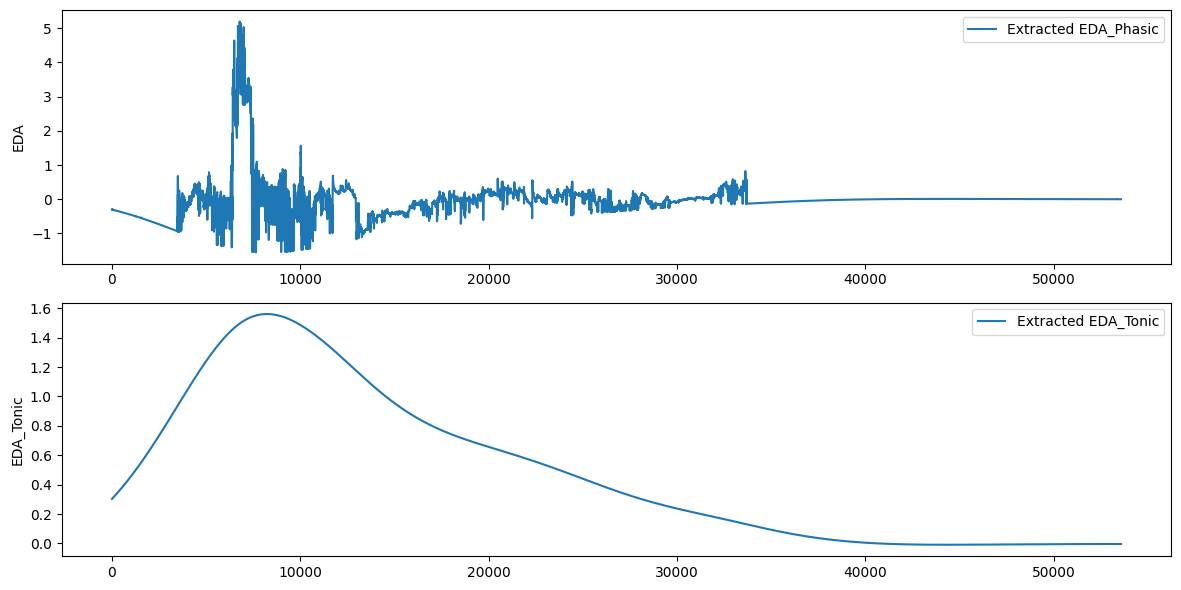

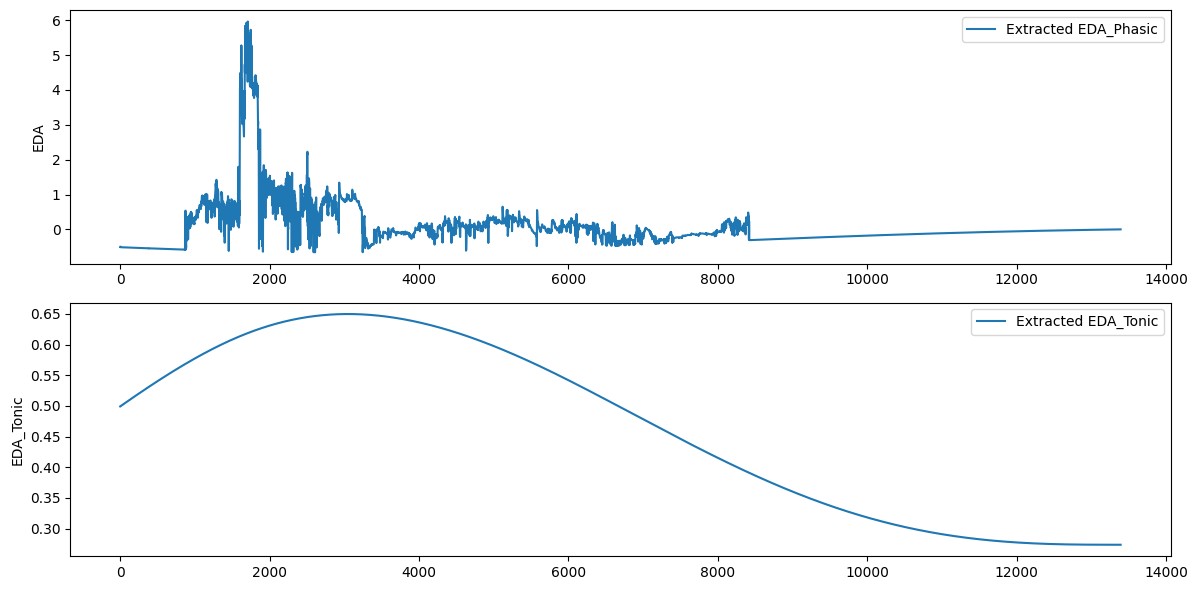

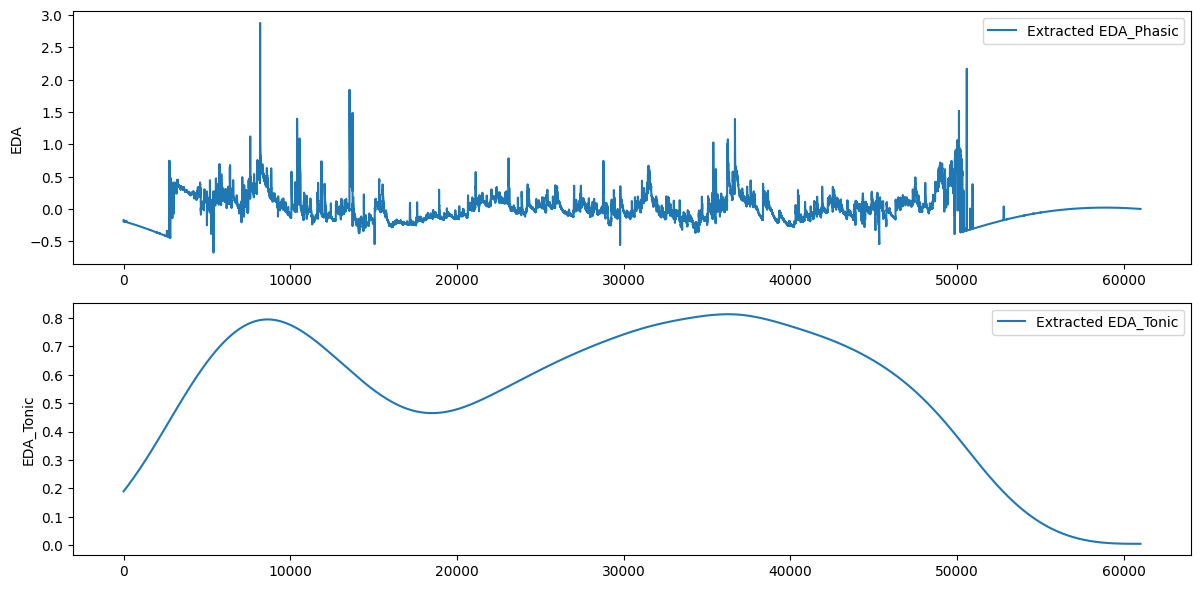

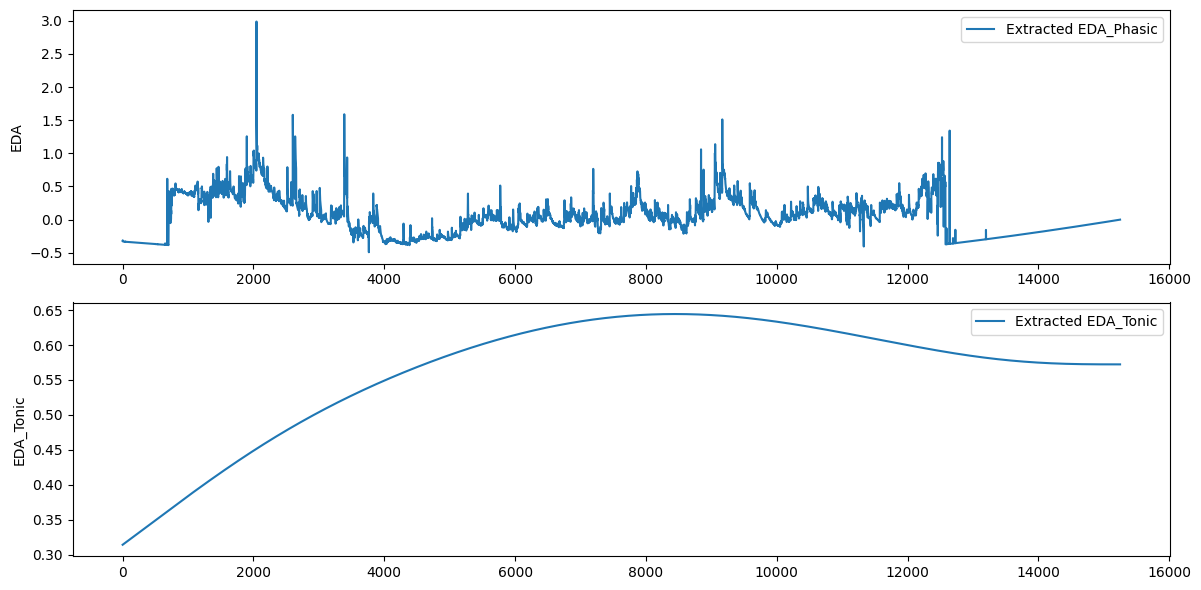

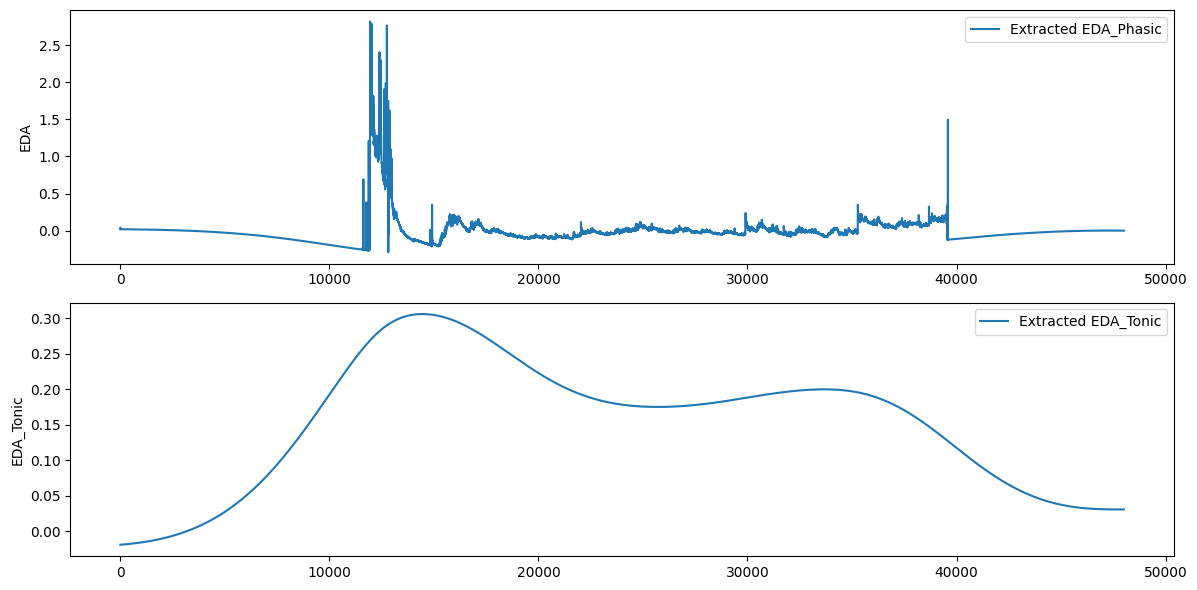

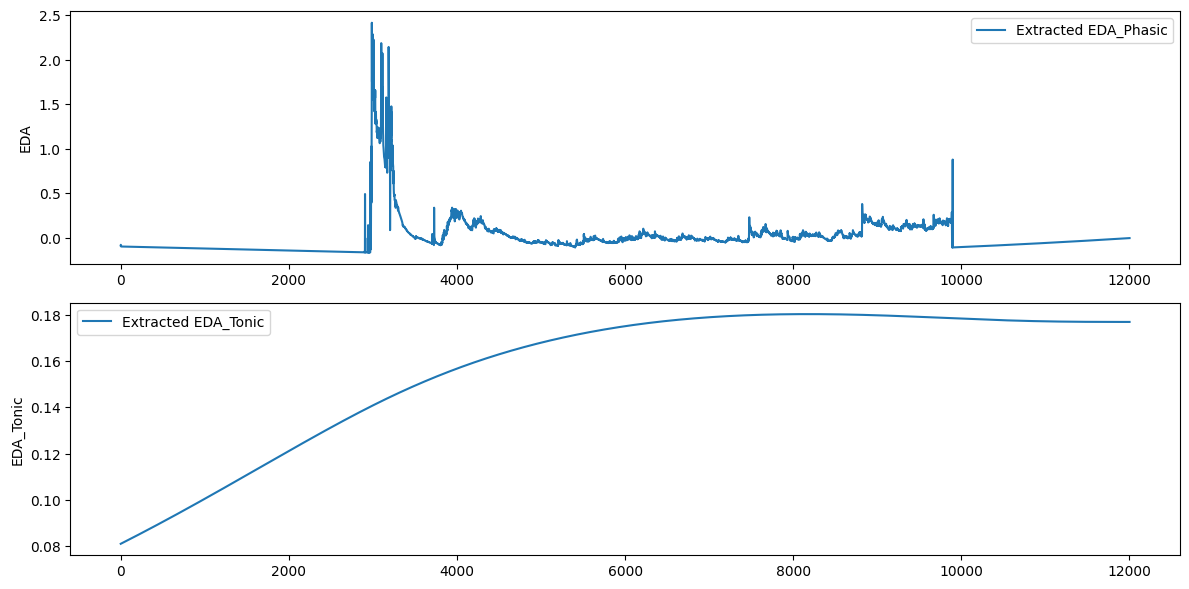

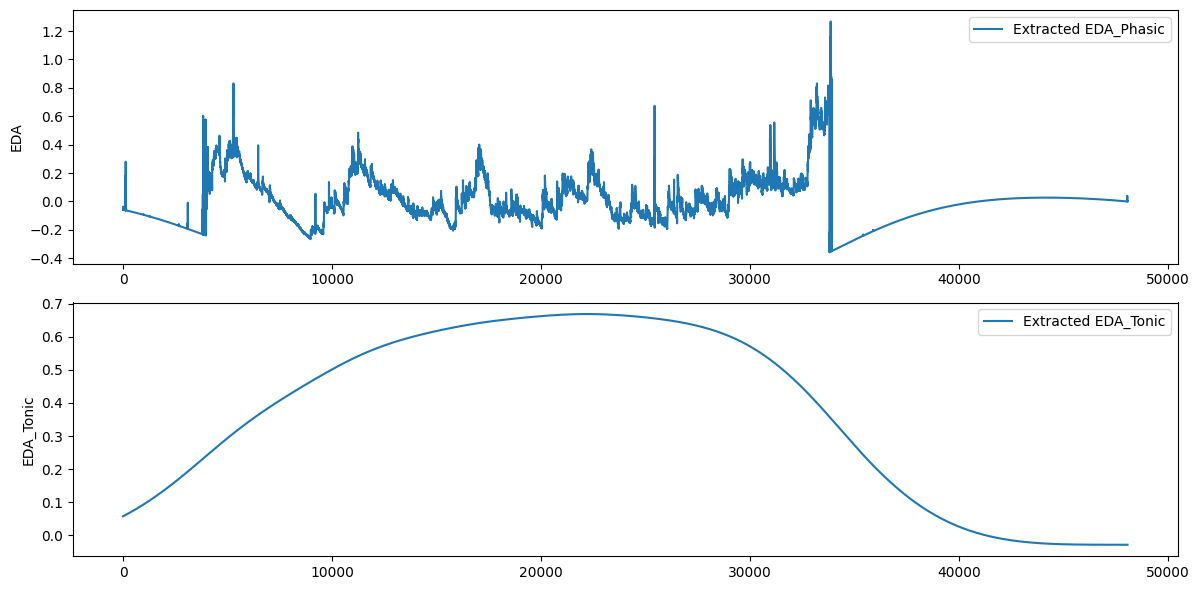

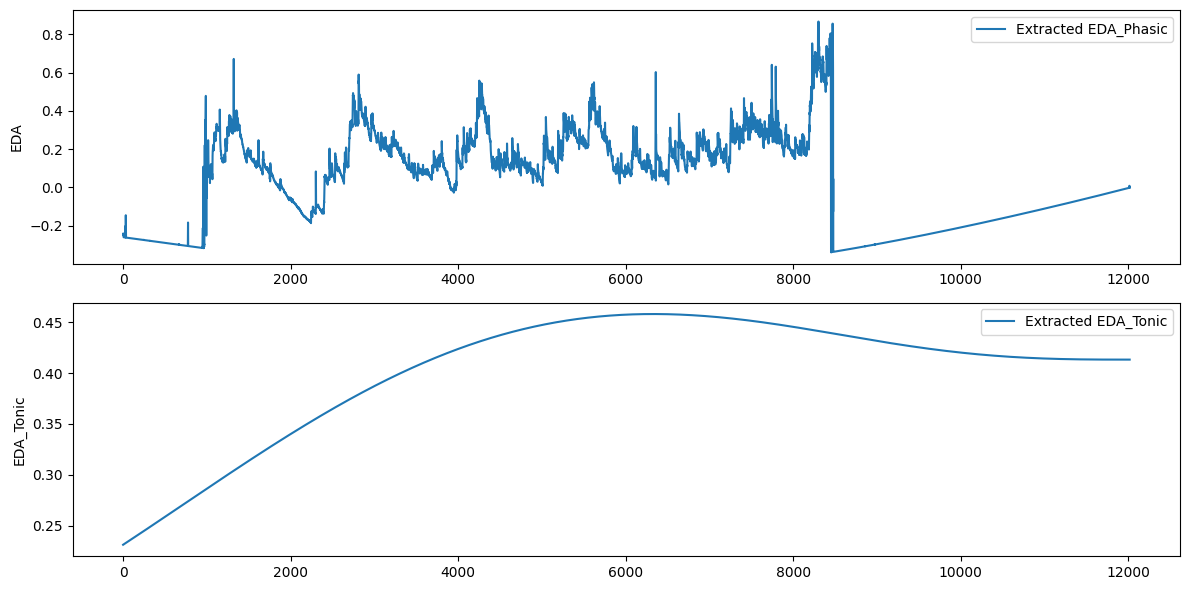

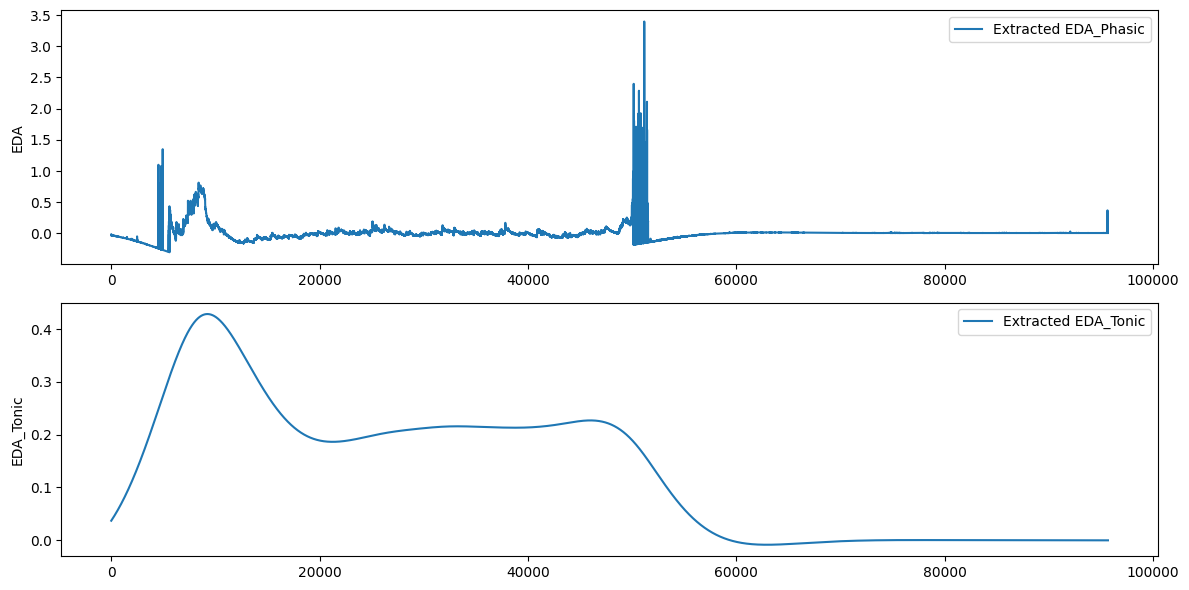

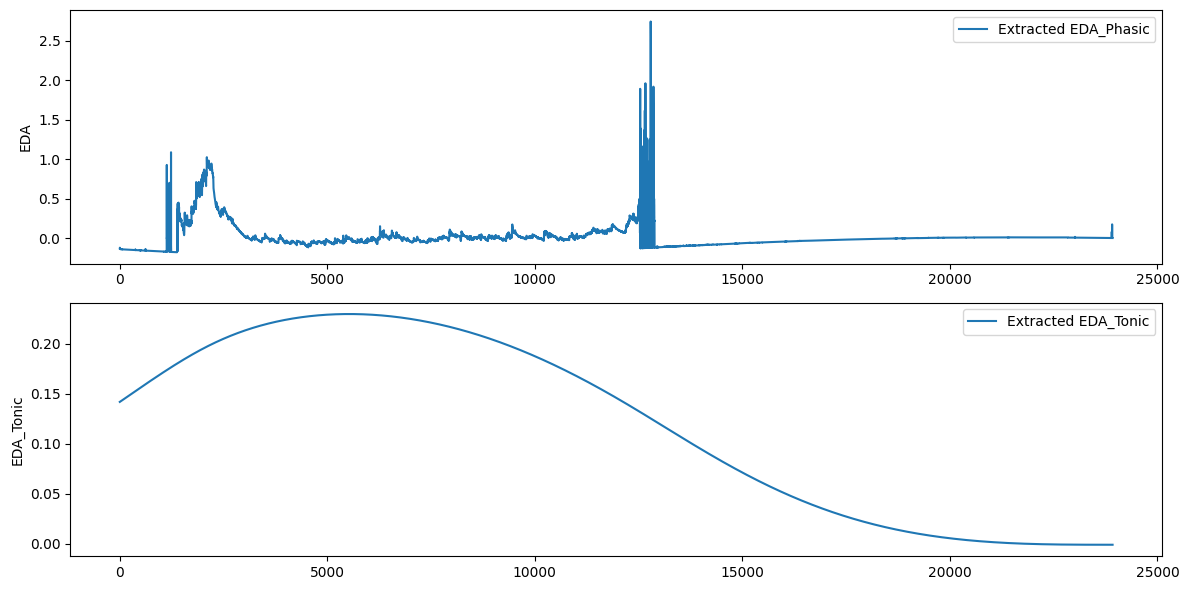

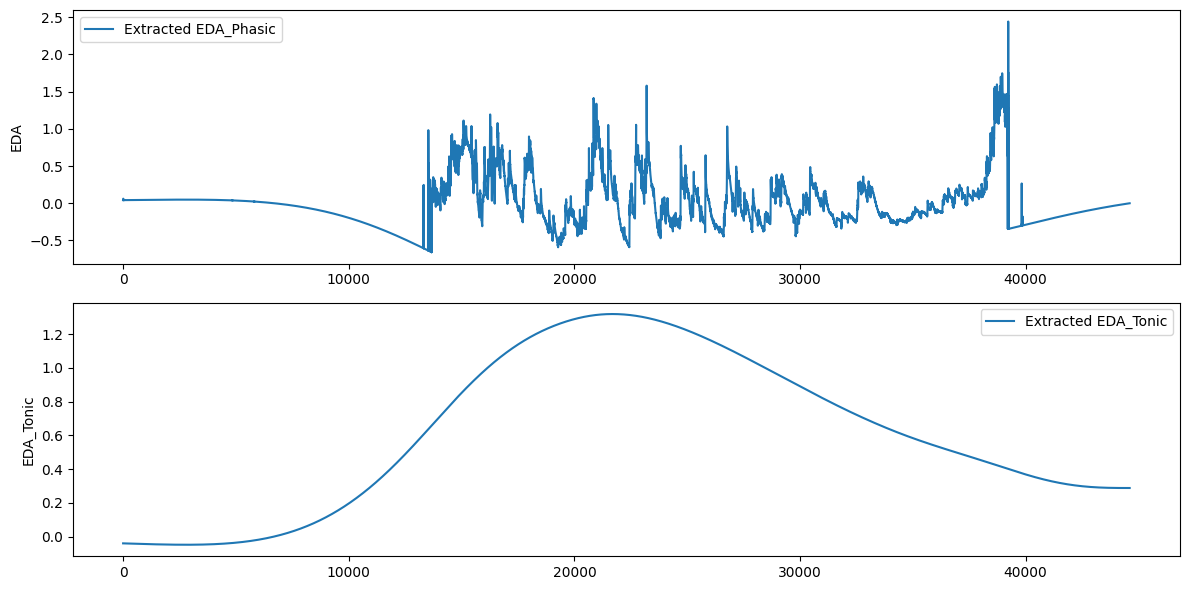

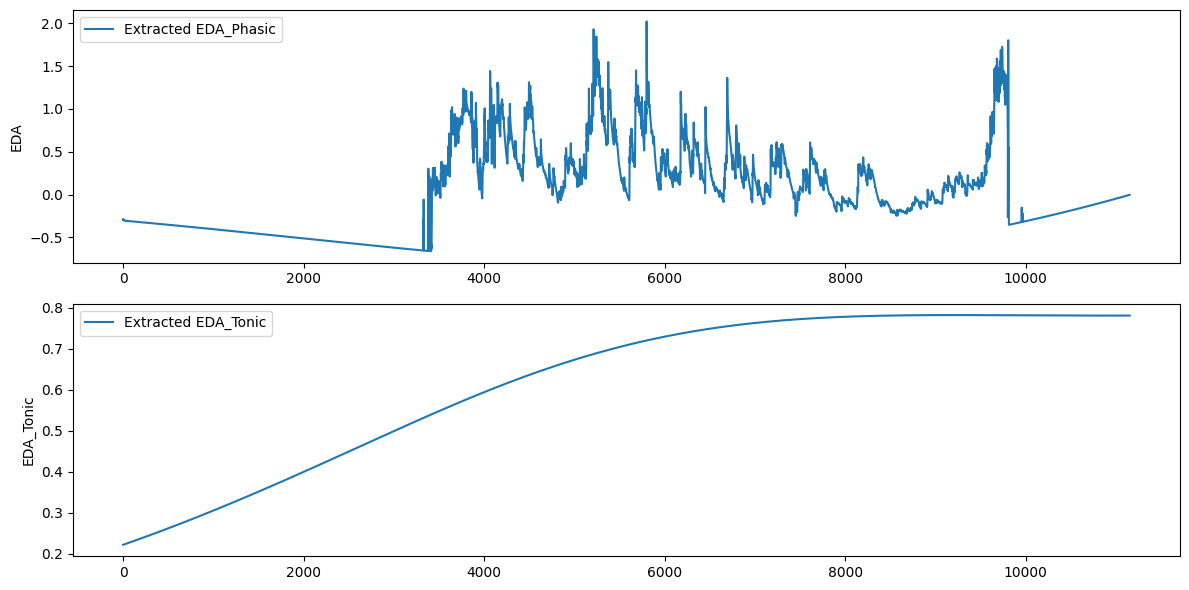

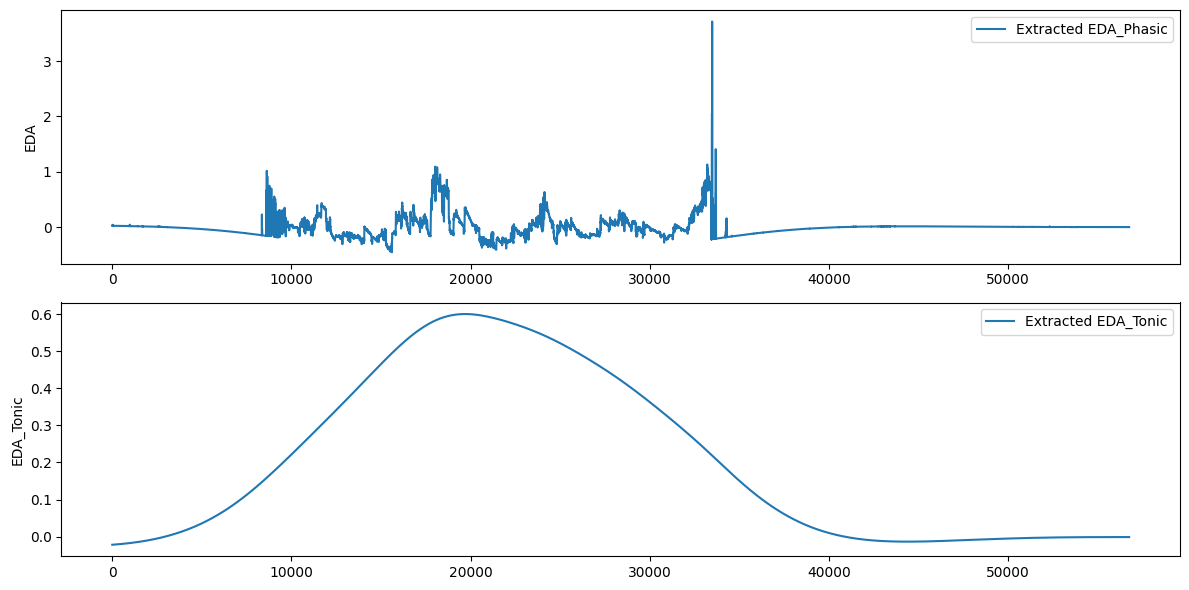

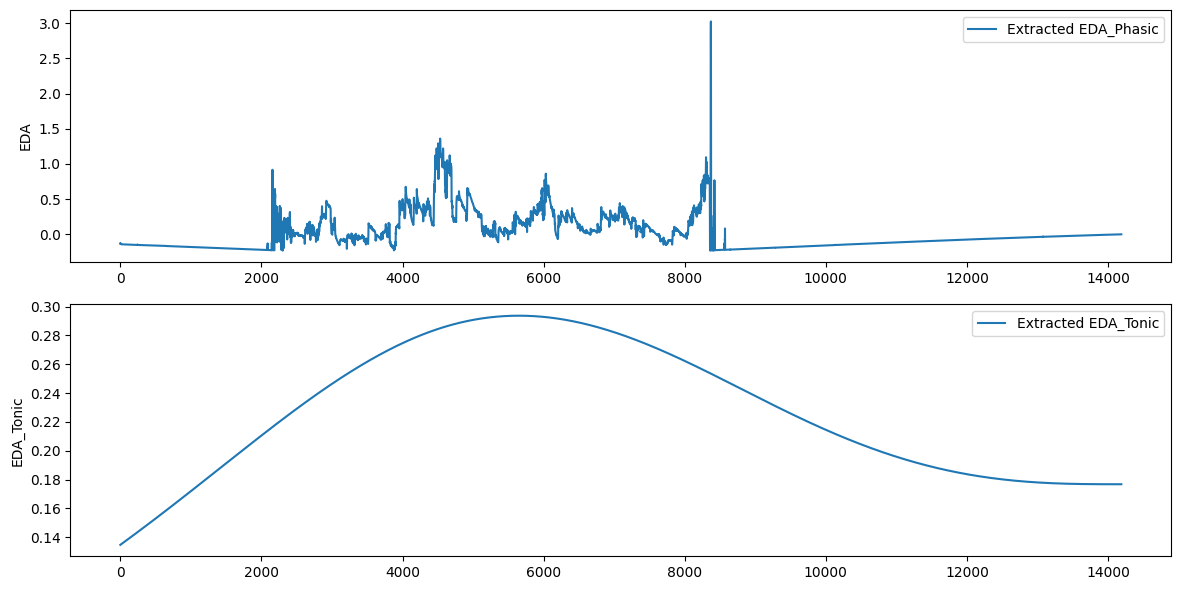

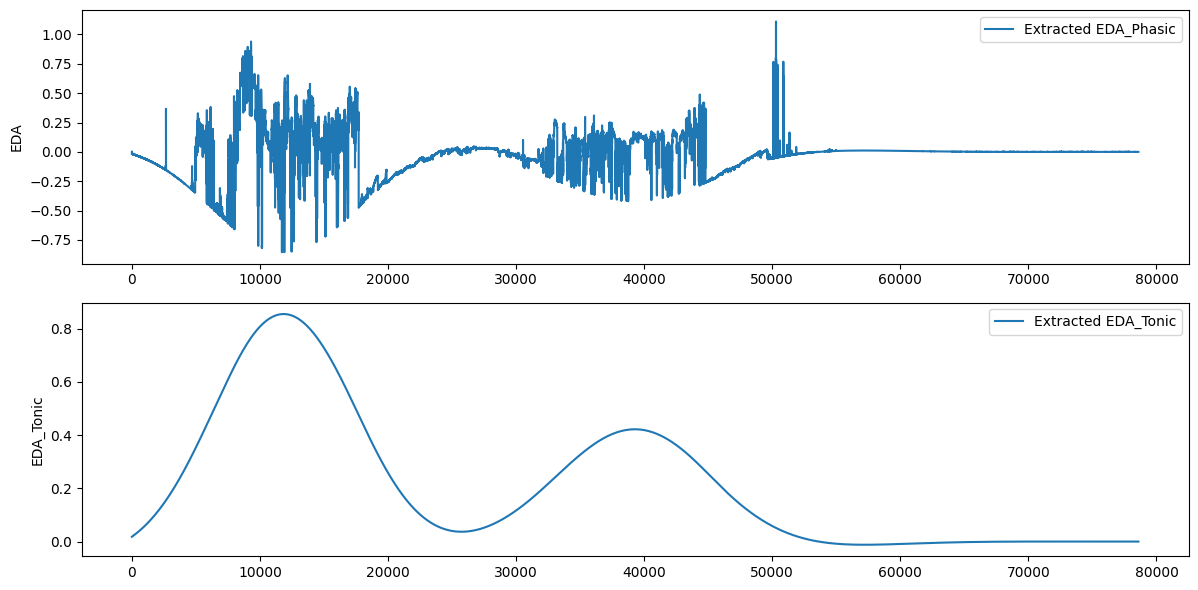

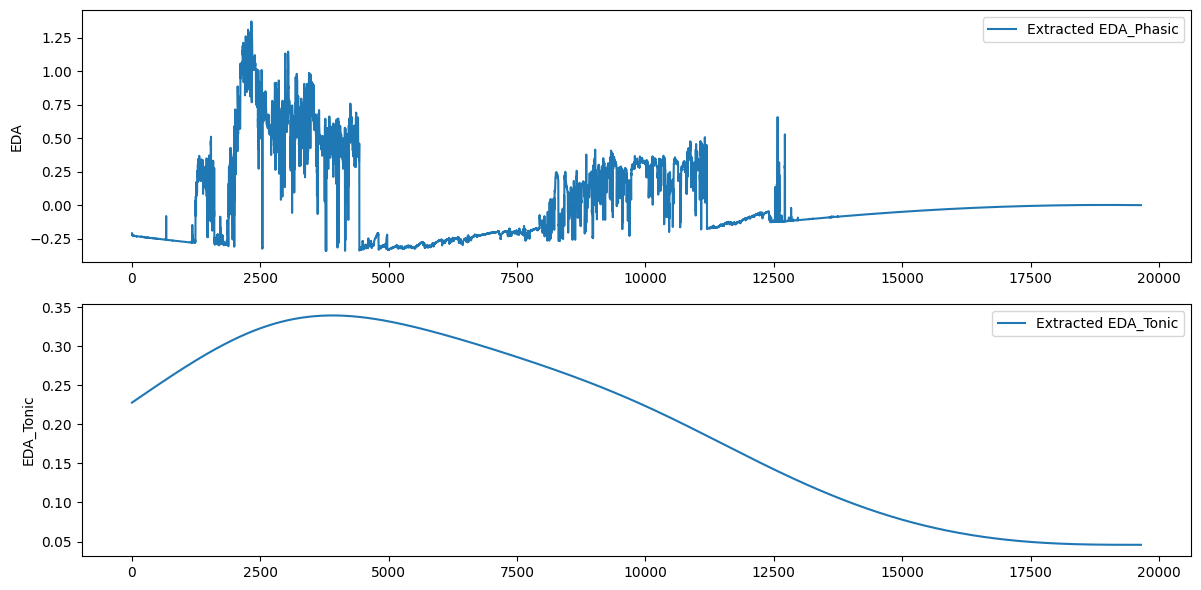

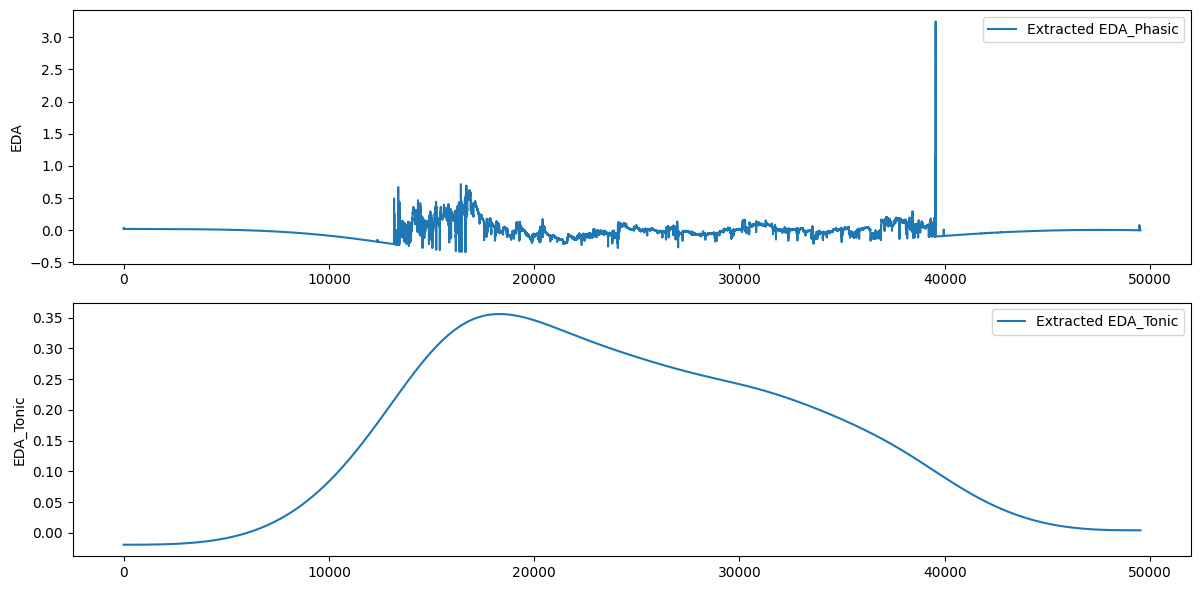

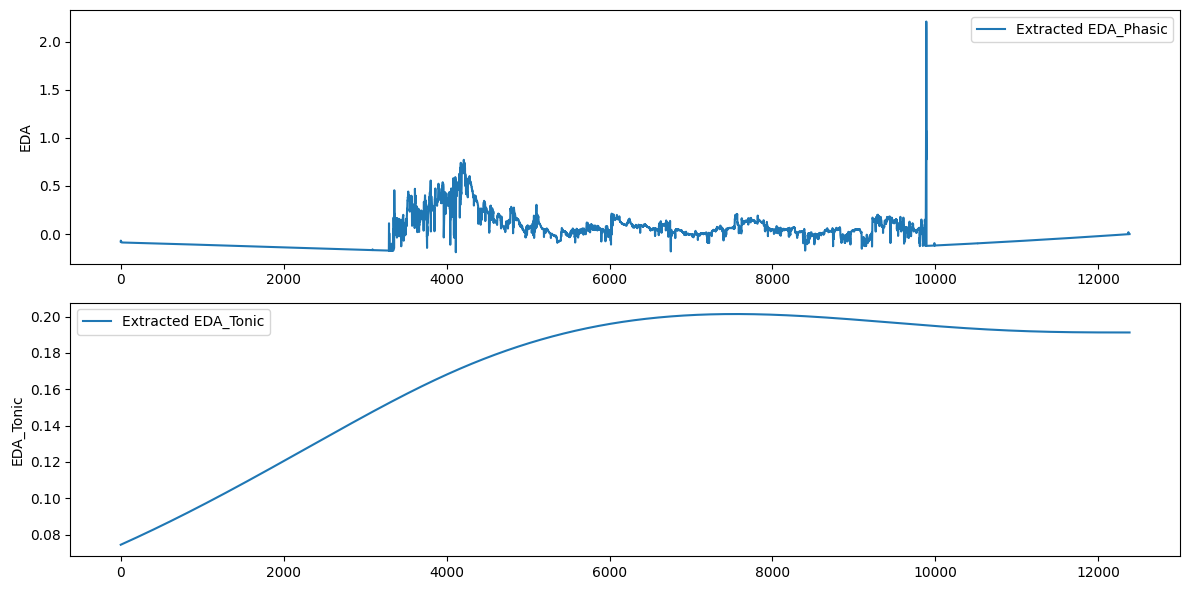

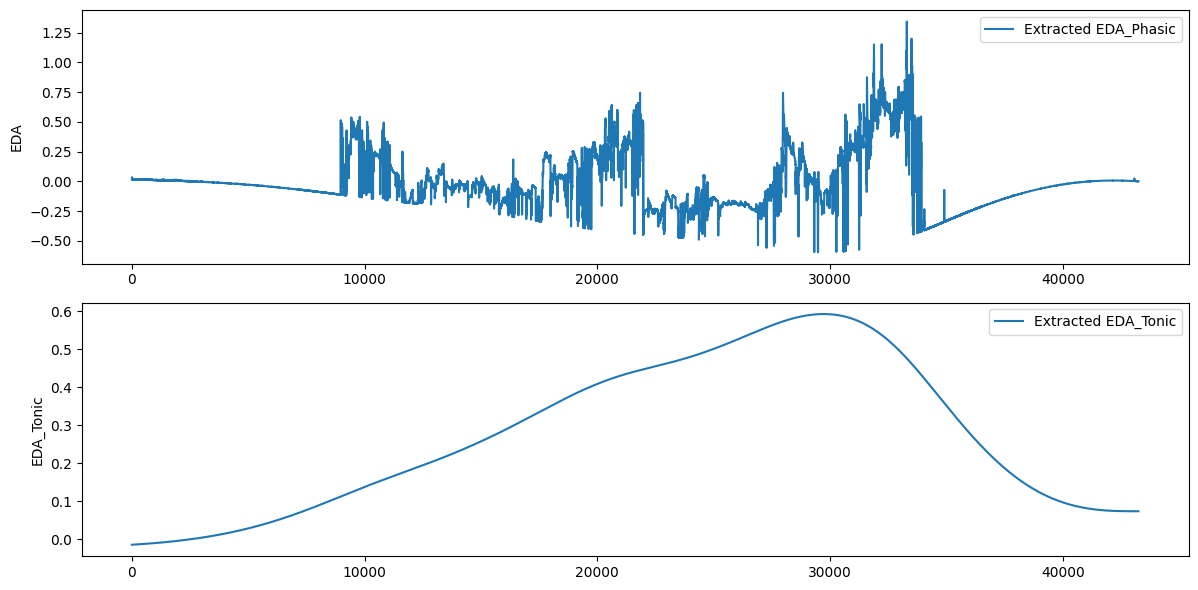

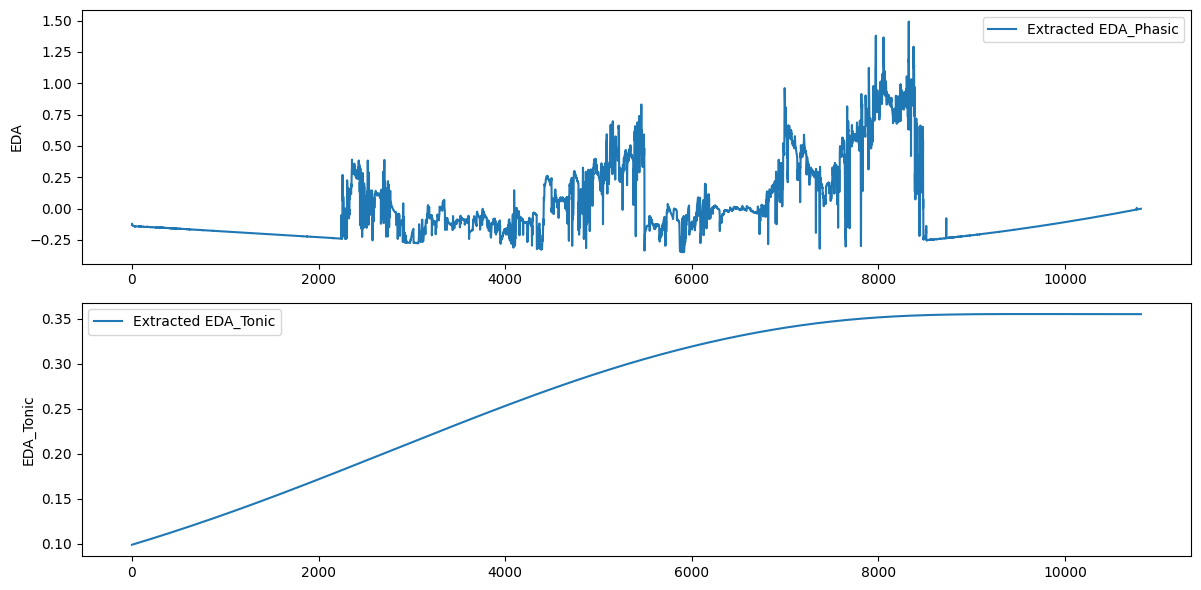

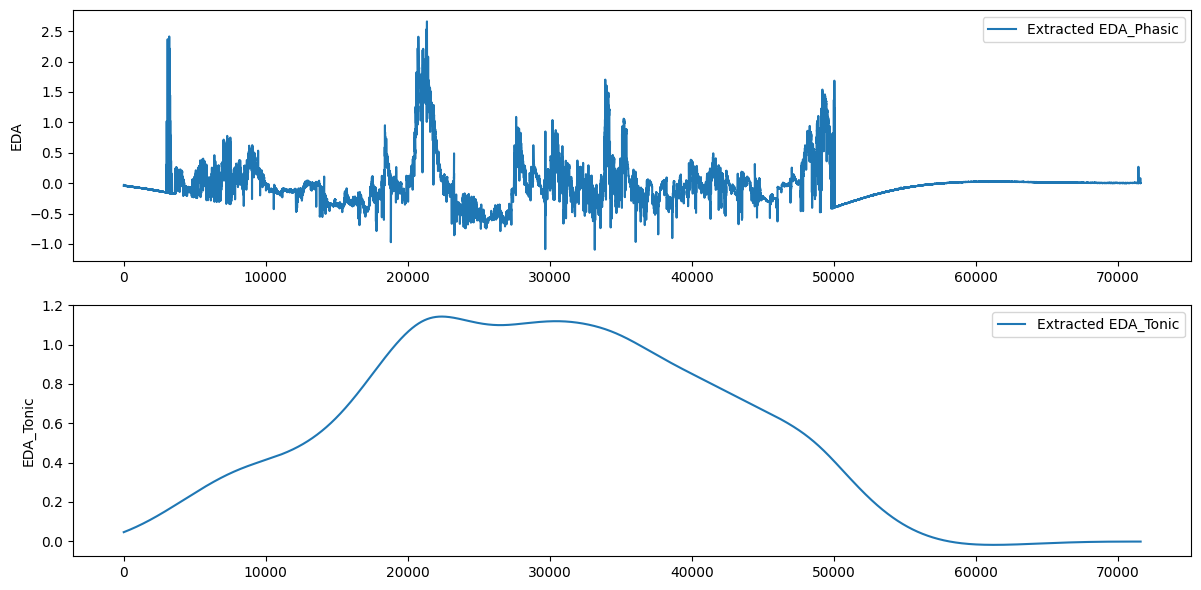

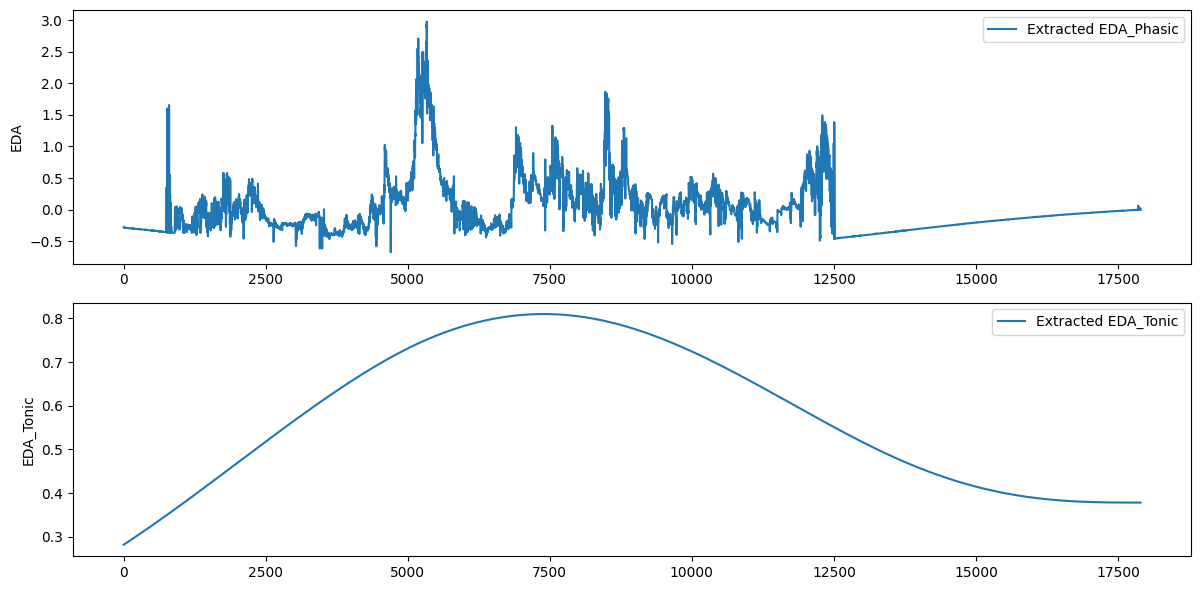

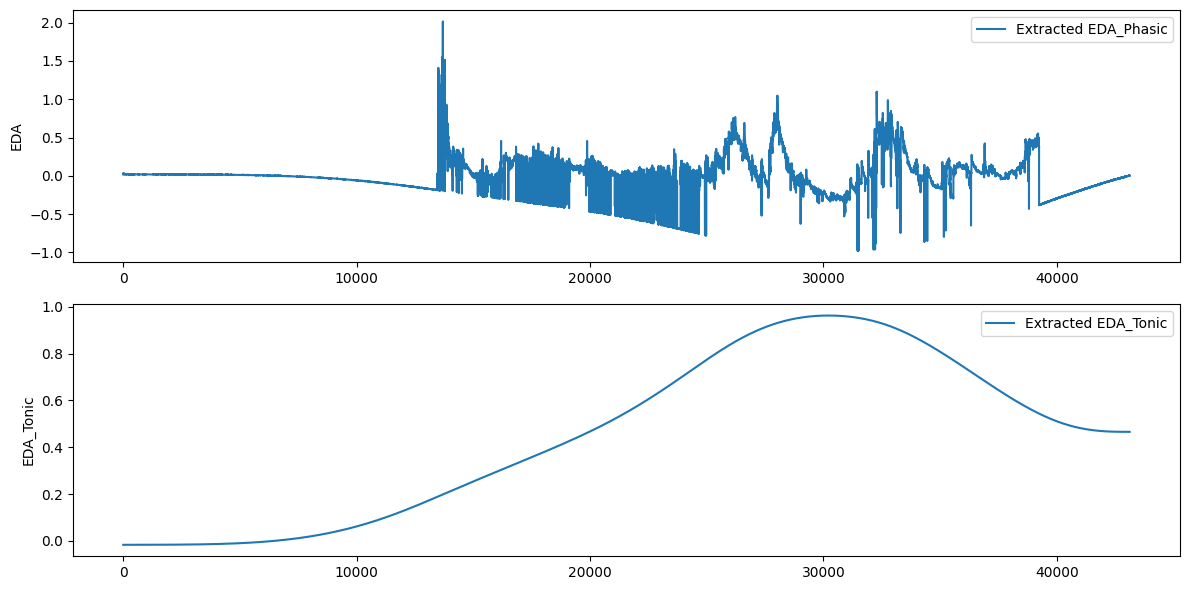

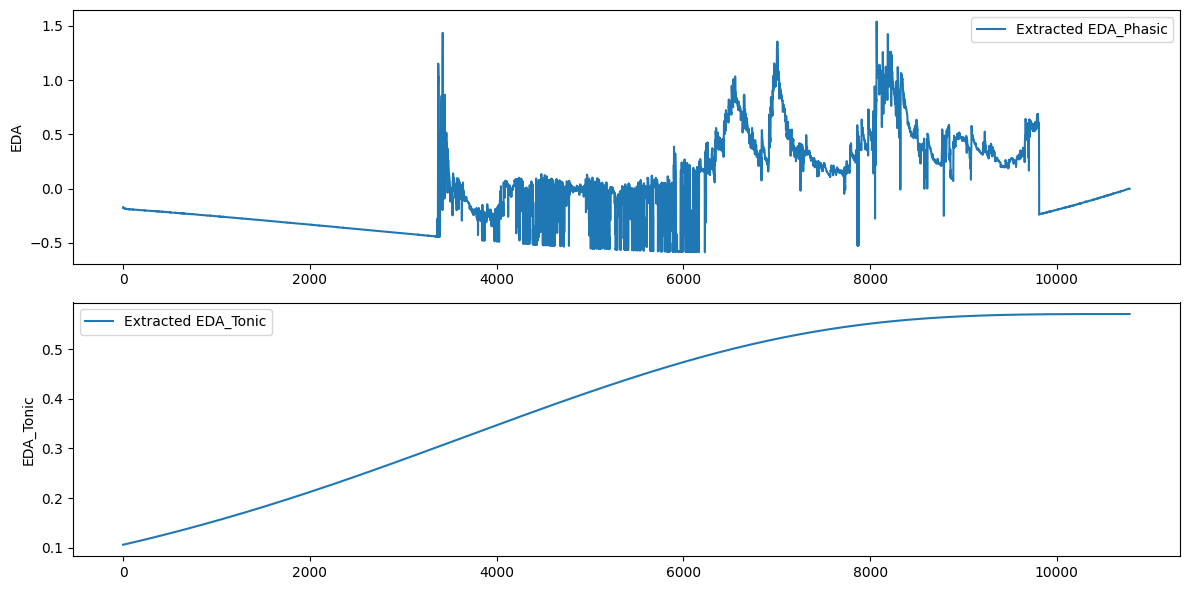

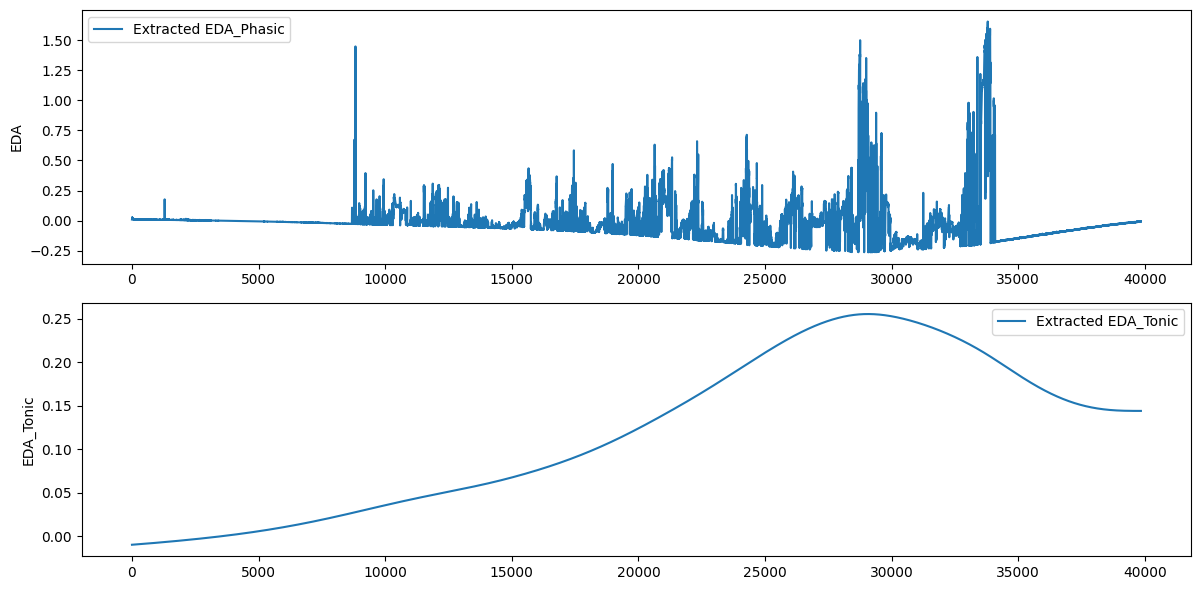

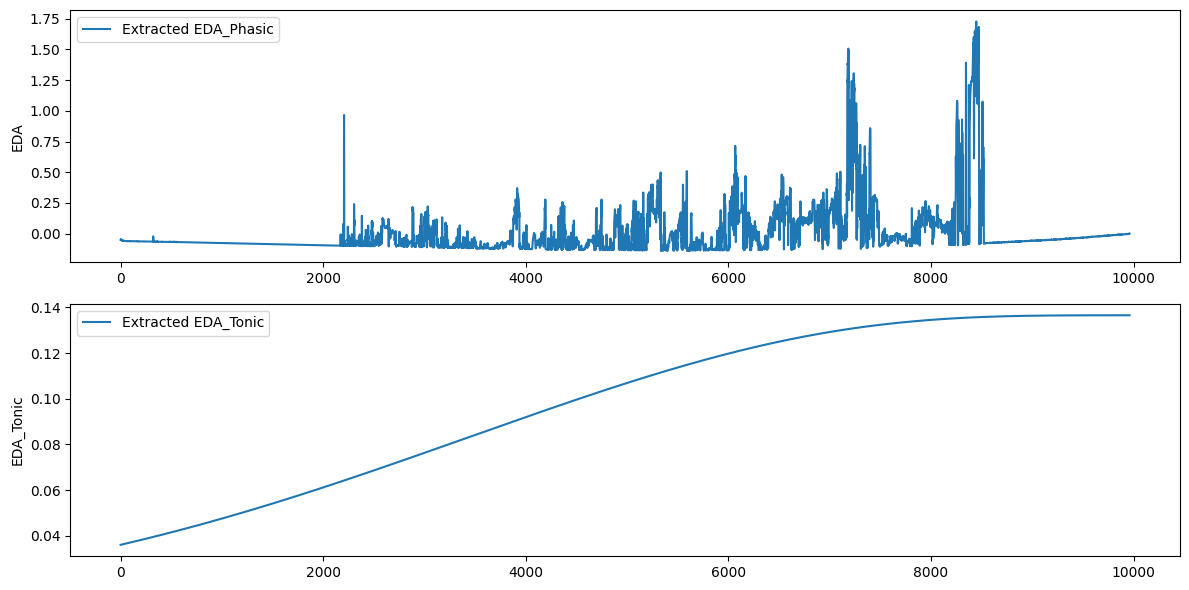

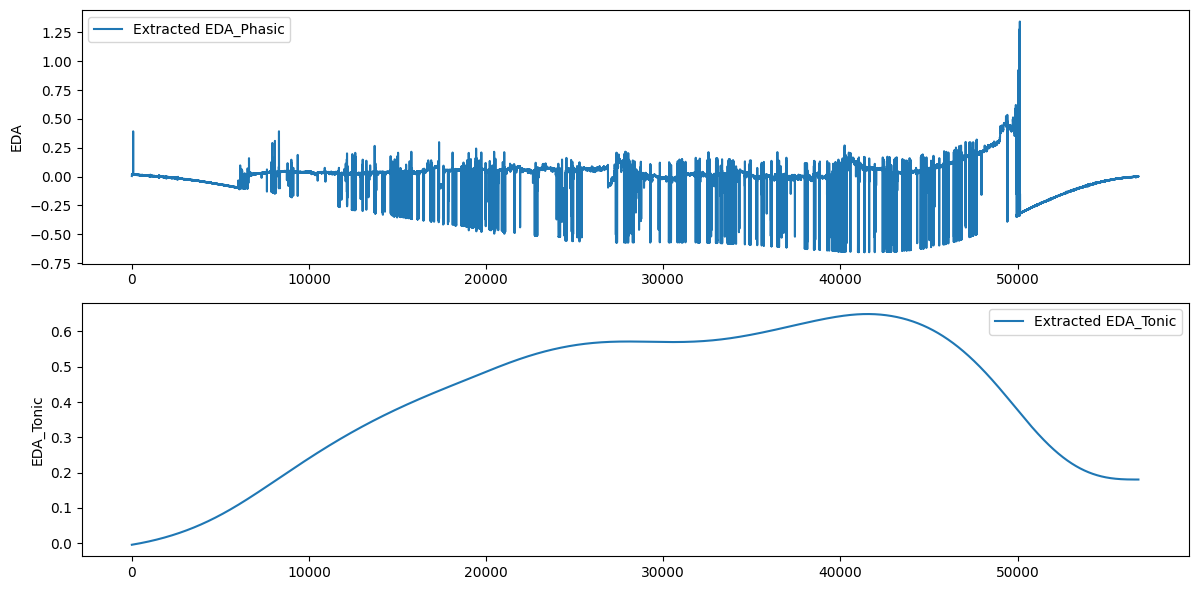

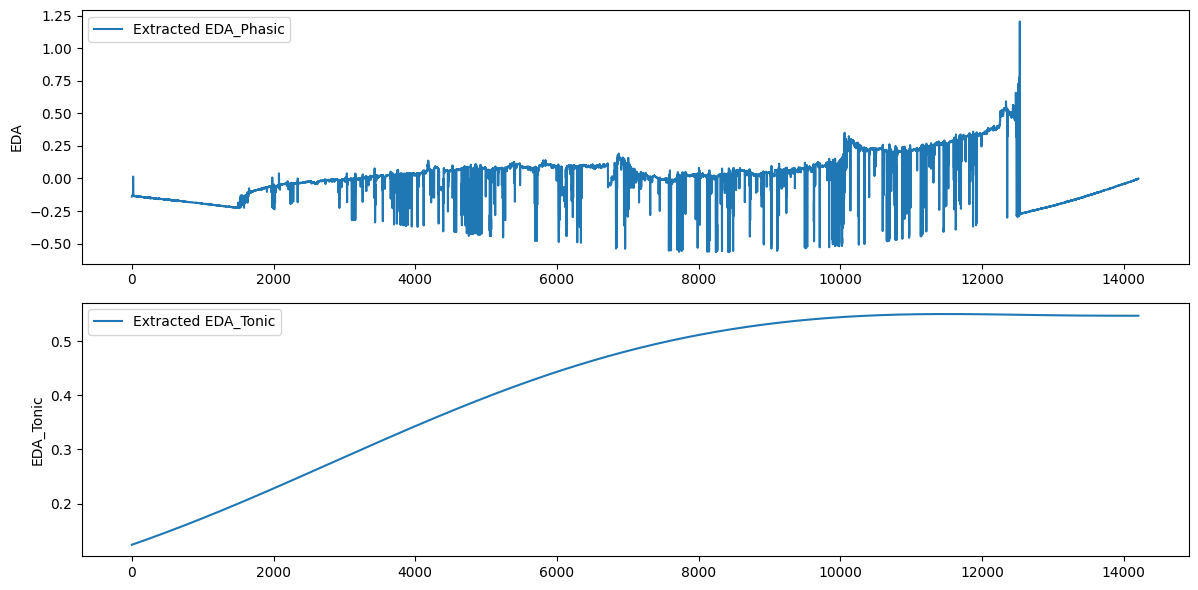

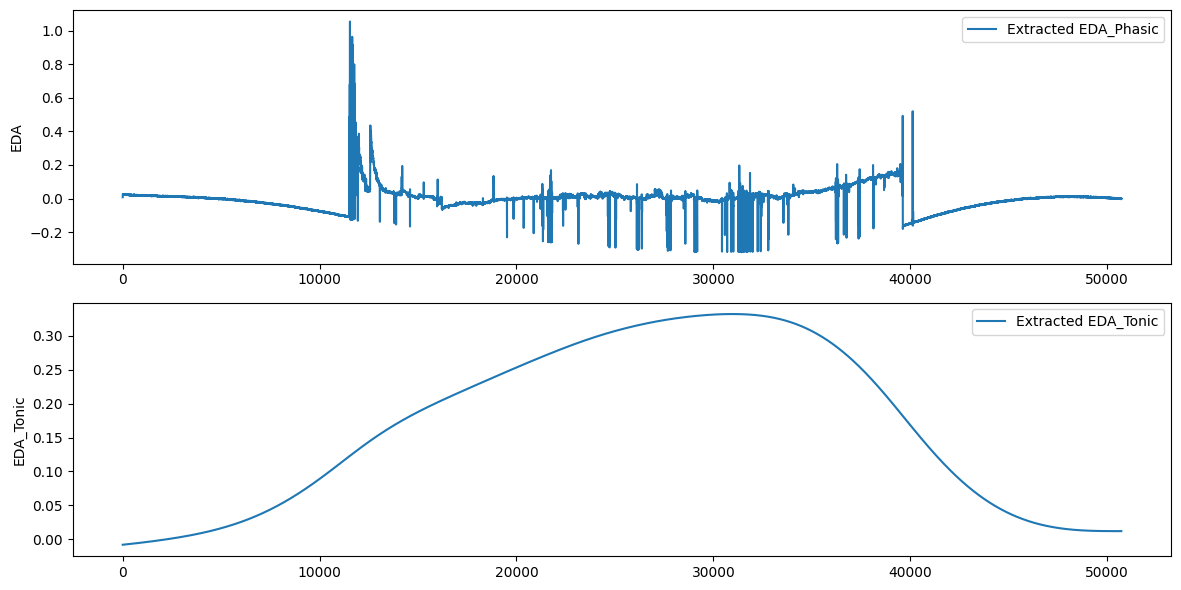

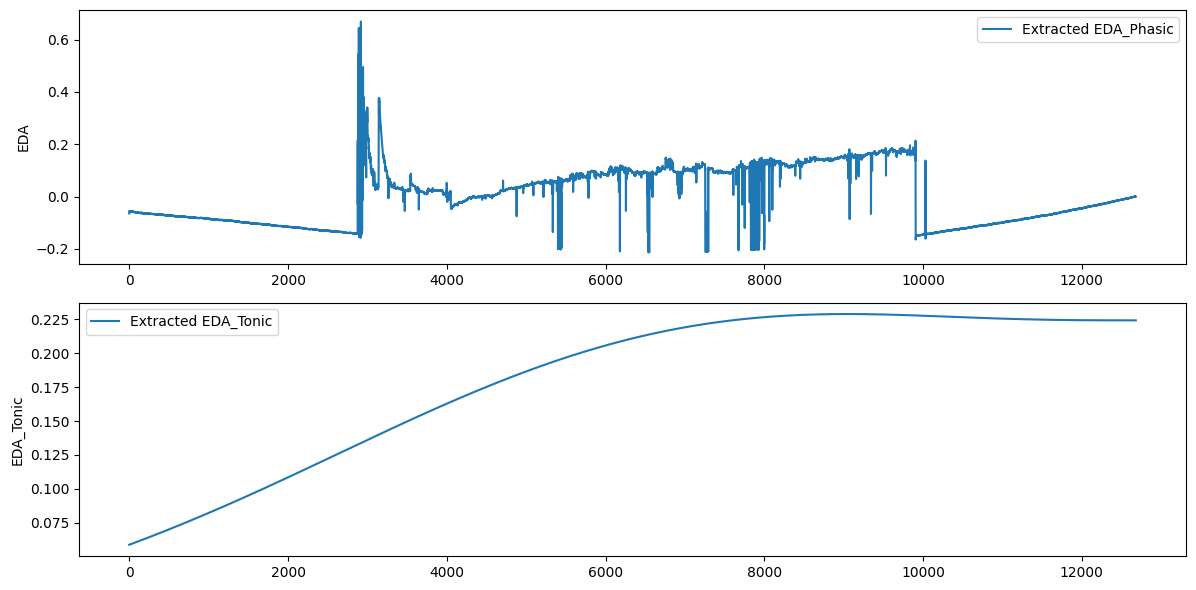

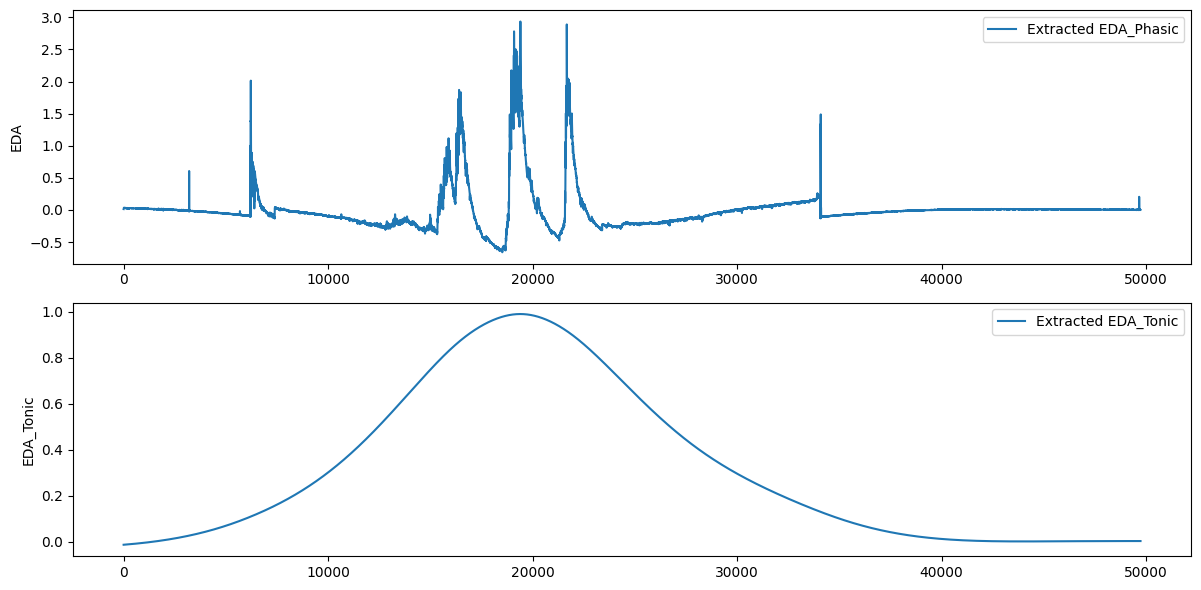

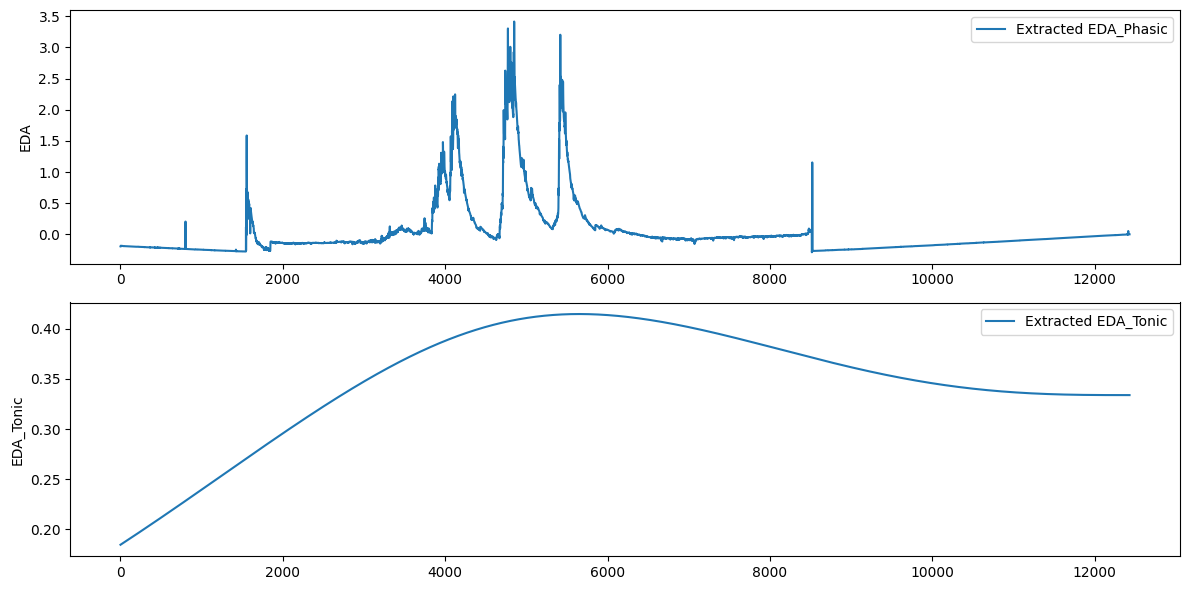

In [7]:
import pandas as pd
import os


# Specify the main folder path where subfolders contain CSV files
main_folder = './dataframes/'  # Replace with your main folder path


# Iterate over subfolders and their contents
for root, dirs, files in os.walk(main_folder):
    for file in files:
        if file.endswith('.csv'):
            # Construct the full path to the CSV file
            csv_file_path = os.path.join(root, file)

            # Create a pandas DataFrame with EDA data from the CSV file
            df = pd.read_csv(csv_file_path)
            
            # Define a dataframe that contains only the SPR signal
            df_eda = pd.DataFrame(df['EDA_1'])

            if not file.endswith('averaged.csv'):
                #take the lines from the third one to the end of the dataframe
                df_eda = df_eda.iloc[2:]

                #drop the first two lines of the raw data because they contain the timestamp and the sample rate
                #df = df.drop([0,1])

                #reset the index
                df_eda = df_eda.reset_index(drop=True)

            # Drop rows with NaN values
            df_eda.dropna(inplace=True)

            #compute phasic and tonic signals
            spr_signal = split_phasic_tonic_signals(df_eda)

            #if it is the averaged (processed by seconds) file we insert two new columns in the csv file
            if file.endswith('averaged.csv'):
                df['EDA_Phasic'] = spr_signal['EDA_Phasic']
                df['EDA_Tonic'] = spr_signal['EDA_Tonic']

                #save the dataframe to the same csv file
                #df.to_csv(csv_file_path[:-4] + '_phasicsplit.csv', index=False)
                df.to_csv(csv_file_path, index=False)
            else:
                #separate the first two lines of the EDA_1 column that contains the timestamp and the sample rate
                twolines = df['EDA_1'].iloc[0:2]

                #concat the two dataframes by columns
                df['EDA_Phasic'] = pd.concat([twolines, spr_signal['EDA_Phasic']], ignore_index=True)*len(df)
                df['EDA_Tonic'] =  pd.concat([twolines, spr_signal['EDA_Tonic']], ignore_index=True)*len(df)
                
                #save the dataframe to the same csv file
                df.to_csv(csv_file_path[:-4] + '_phasicsplit.csv', index=False)


            #plot the phasic and tonic signals
            plot_phasic_tonic_signals(spr_signal, csv_file_path)

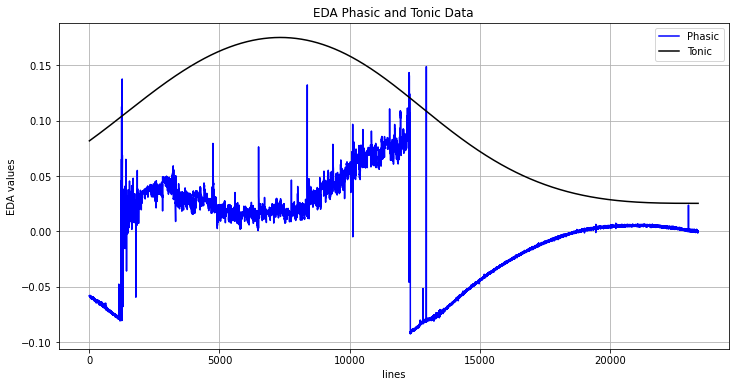

In [27]:
# Create a plot with two lines
plt.figure(figsize=(12, 6))  # Optional: Adjust the figure size
plt.plot(spr_signal.index, spr_signal['EDA_Phasic'], label='Phasic', linestyle='-', color='blue')
plt.plot(spr_signal.index, spr_signal['EDA_Tonic'], label='Tonic', linestyle='-', color='black')

# Add labels and a legend
plt.xlabel('lines')
plt.ylabel('EDA values')
plt.title('EDA Phasic and Tonic Data')
plt.legend()

# Show the plot
plt.grid(True)  # Optional: Add grid lines
plt.show()